In [1]:
import os
import pandas as pd
from pandas import read_csv
from datetime import datetime
os.chdir(r"C:\Users\USER\Desktop\ETo data")
data = read_csv('Ikere_Gorge_Dam.csv', header = 6, names = ['Date', 'Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation', 'ETo'])
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
df = data['Sunlight hours']
data.head(7)




Temp min  Temp max  Wind speed  Sunlight hours  Solar Radiation  \
Date                                                                          
1979-01-01      20.7      33.1        1.20        9.972500         17.27136   
1979-02-01      20.5      34.6        1.40        9.655556         17.45280   
1979-03-01      22.3      34.7        1.87        9.668333         18.21312   
1979-04-01      22.2      33.1        2.21        9.549722         17.41824   
1979-05-01      21.2      30.8        1.61        9.888056         18.87840   
1979-06-01      20.5      28.9        1.71        8.783889         14.29920   
1979-07-01      20.2      27.6        1.69        7.991667         11.99232   

             ETo  
Date              
1979-01-01  4.08  
1979-02-01  4.51  
1979-03-01  5.01  
1979-04-01  4.90  
1979-05-01  4.48  
1979-06-01  3.65  
1979-07-01  3.18

### Checking for missing values

In [2]:
print(data.isnull())
print(data.isnull().any())

            Temp min  Temp max  Wind speed  Sunlight hours  Solar Radiation  \
Date                                                                          
1979-01-01     False     False       False           False            False   
1979-02-01     False     False       False           False            False   
1979-03-01     False     False       False           False            False   
1979-04-01     False     False       False           False            False   
1979-05-01     False     False       False           False            False   
...              ...       ...         ...             ...              ...   
2016-10-01     False     False       False           False            False   
2016-11-01     False     False       False           False            False   
2016-12-01     False     False       False           False            False   
2017-01-01     False     False       False           False            False   
2017-02-01     False     False       False          

### Importing the necessary libraries

In [3]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import statistics
from scipy import stats
import plotly.express as px
from sklearn.metrics import mean_squared_error


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Plotting the variables for analysis

array([[<AxesSubplot:title={'center':'Temp min'}>,
        <AxesSubplot:title={'center':'Temp max'}>],
       [<AxesSubplot:title={'center':'Wind speed'}>,
        <AxesSubplot:title={'center':'Sunlight hours'}>],
       [<AxesSubplot:title={'center':'Solar Radiation'}>,
        <AxesSubplot:title={'center':'ETo'}>]], dtype=object)

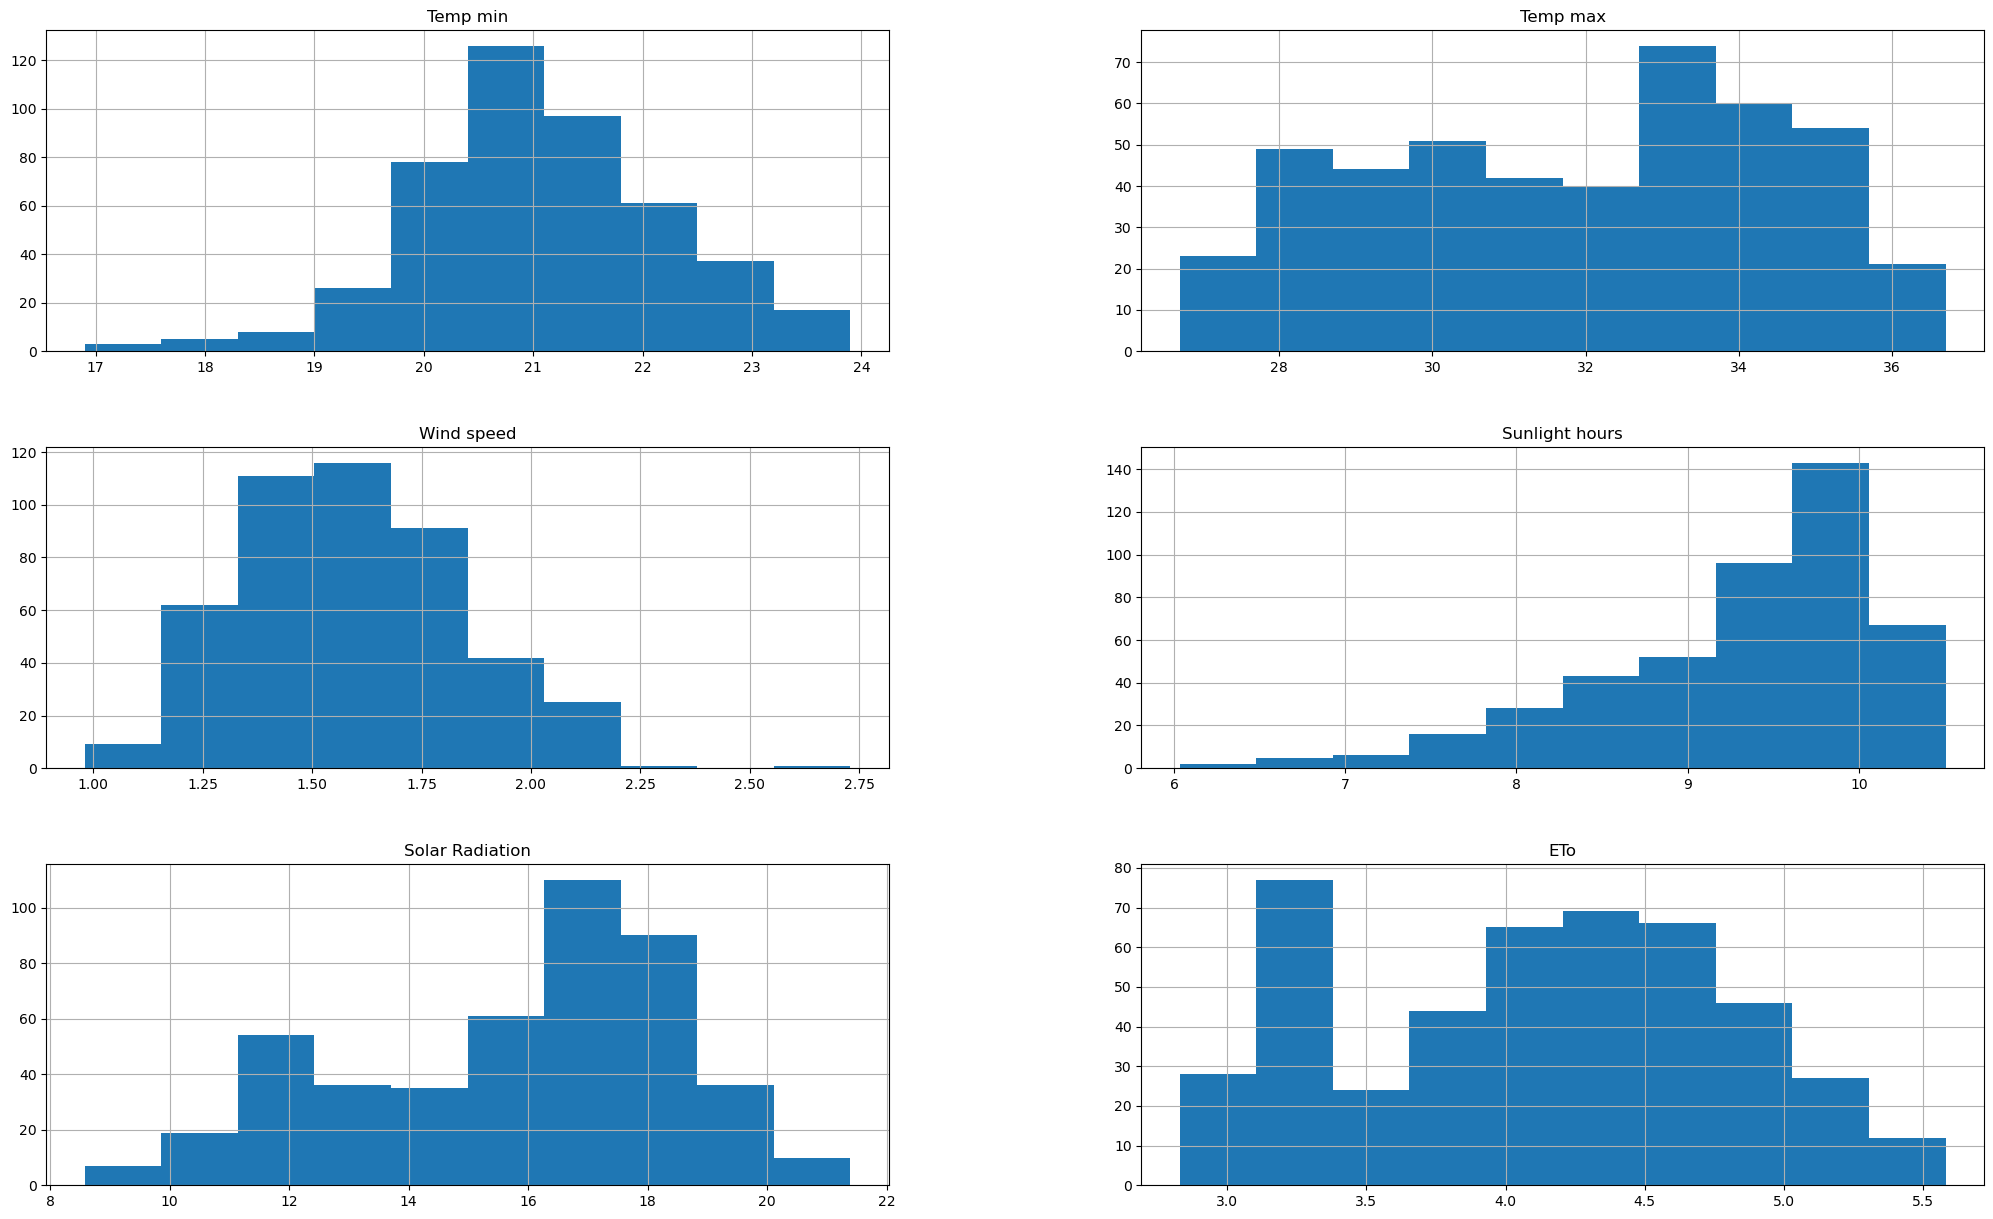

In [4]:
data.hist(figsize=(25,15))

<AxesSubplot:>

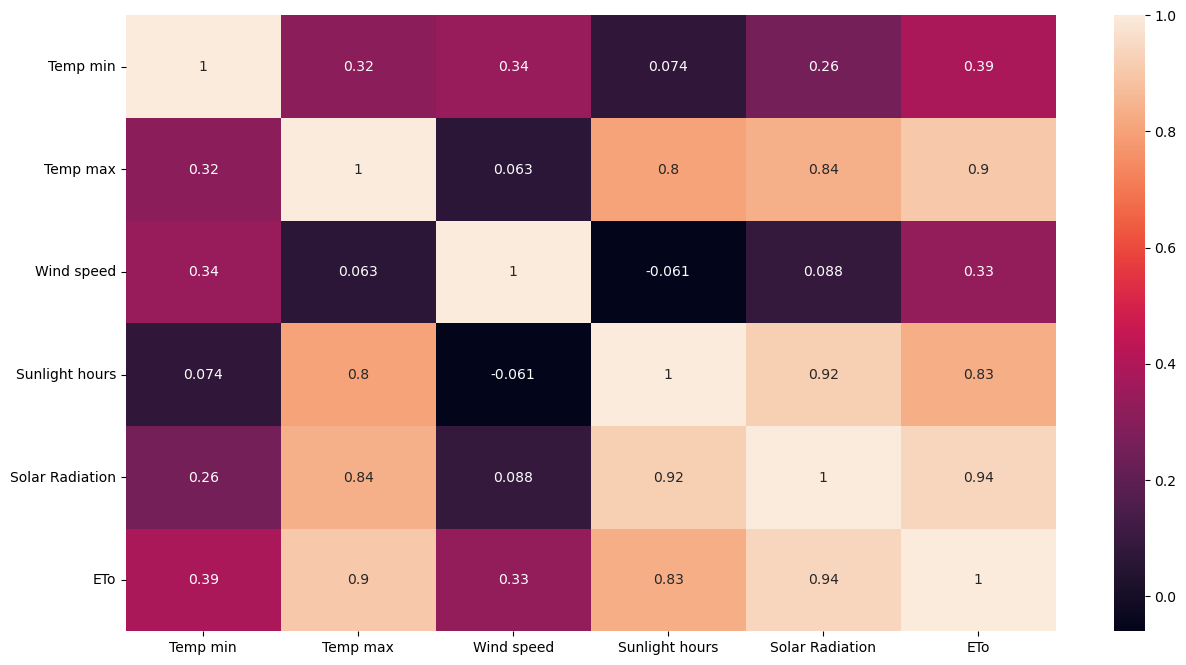

In [5]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="rocket")

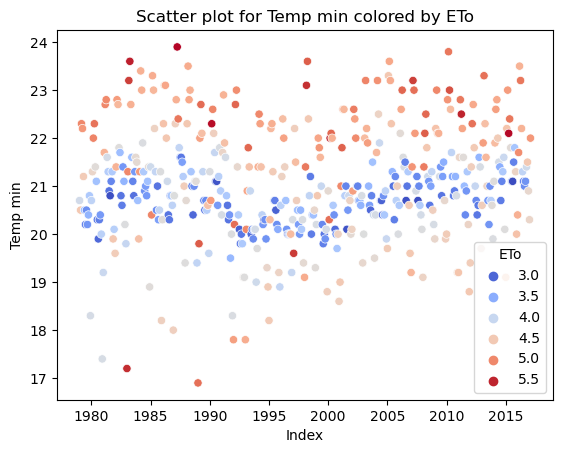

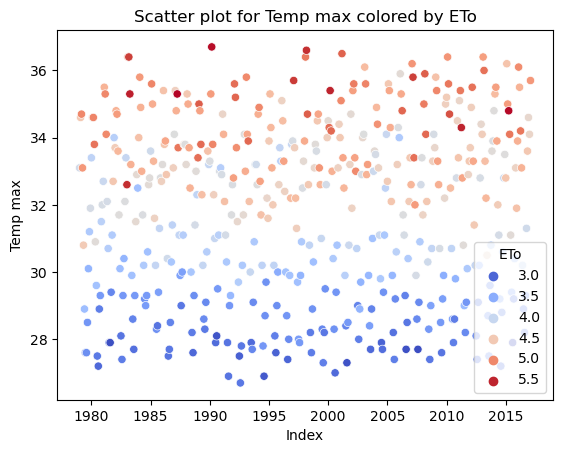

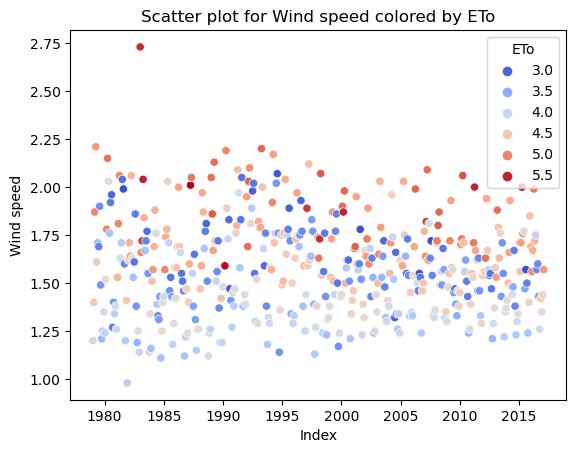

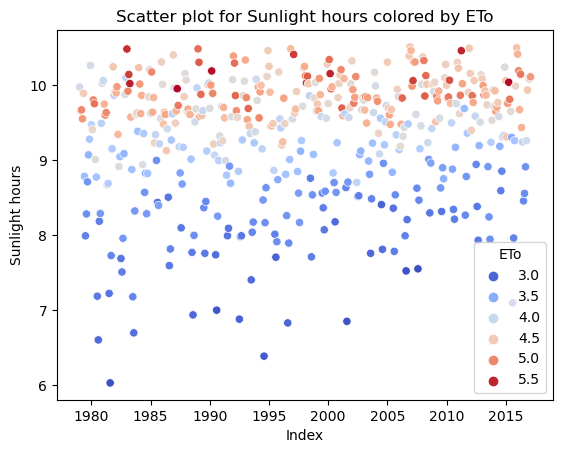

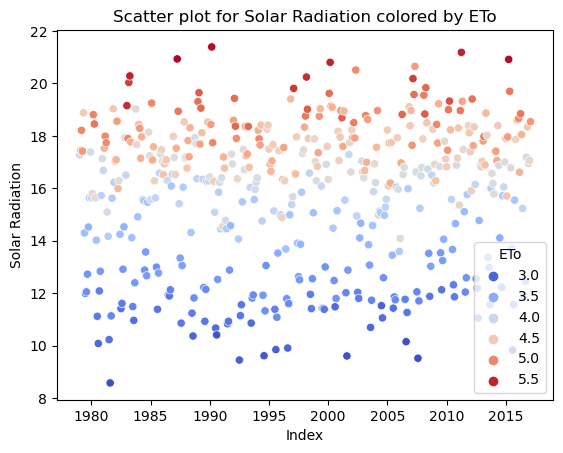

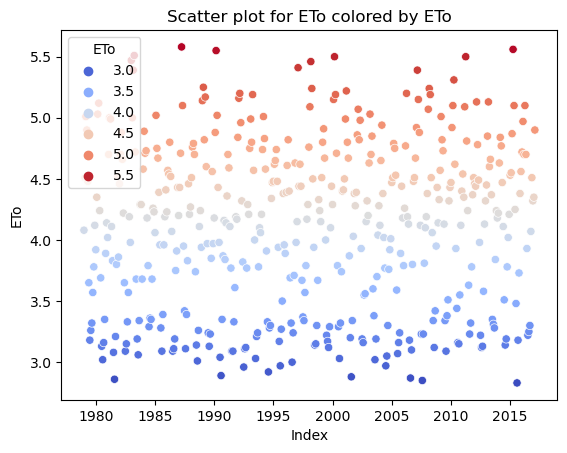

In [6]:
numerical_columns = [col for col in data.columns if data[col].dtype != 'O' and col != 'Date']

for feature in numerical_columns:
    sns.scatterplot(x=data.index, y=data[feature], hue=data['ETo'], palette='coolwarm')
    plt.title(f'Scatter plot for {feature} colored by ETo')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.show()

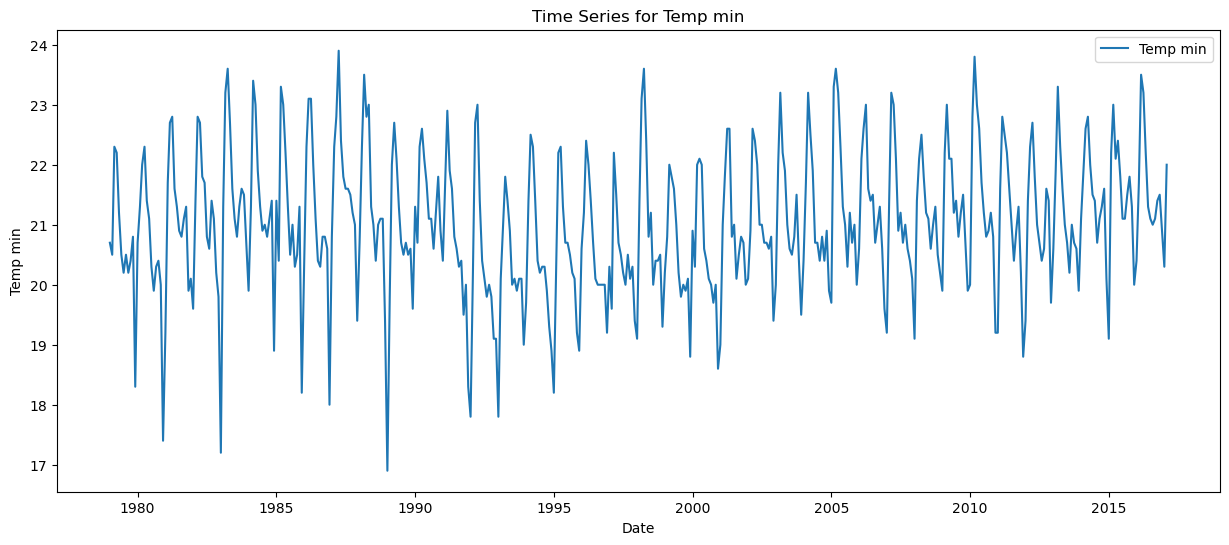

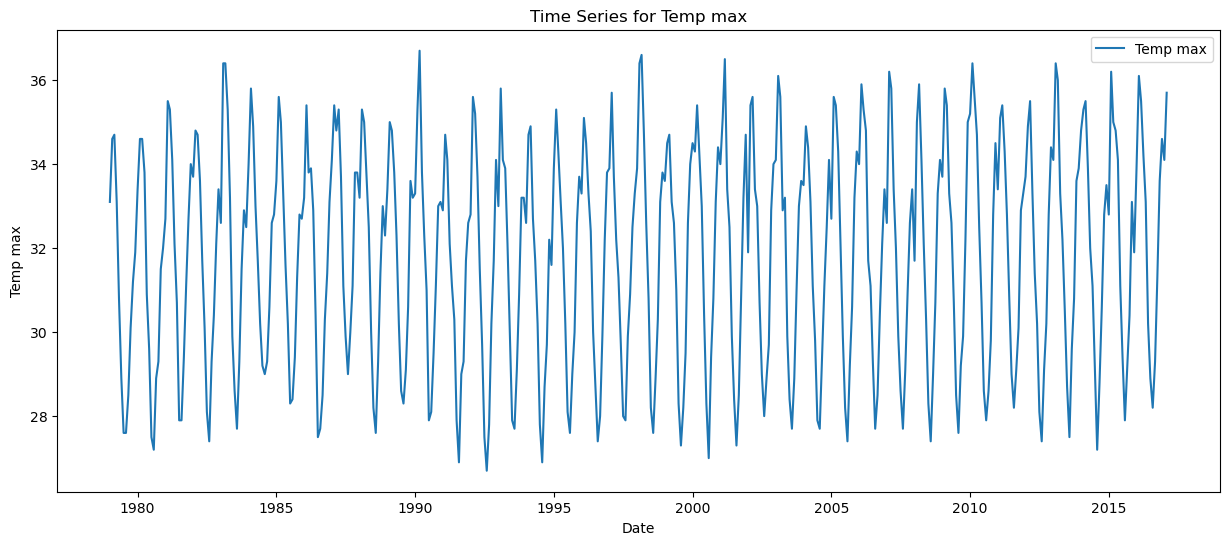

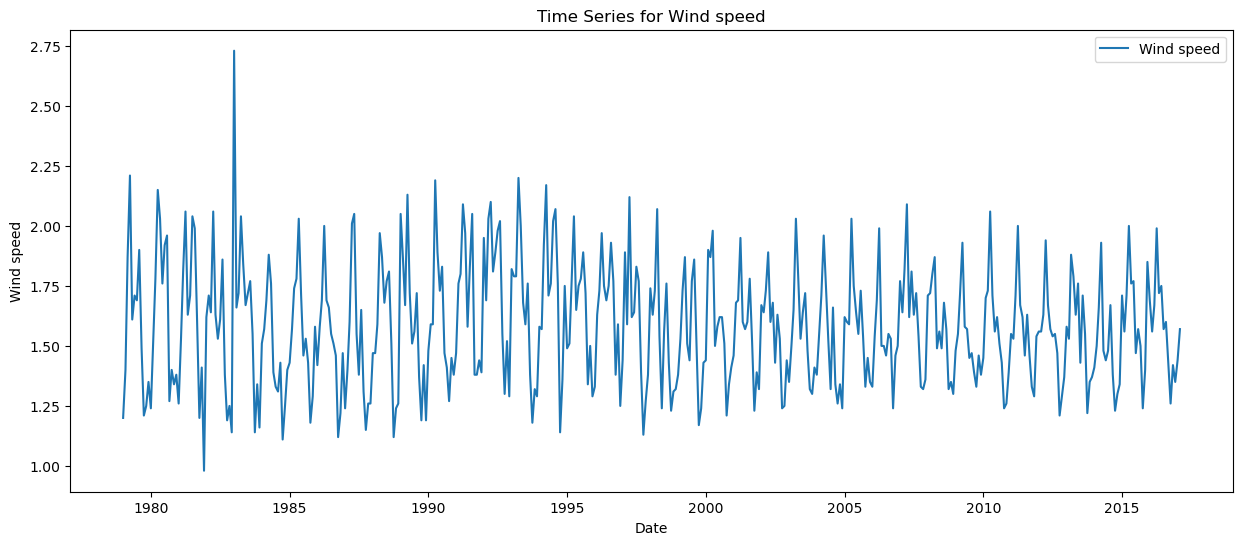

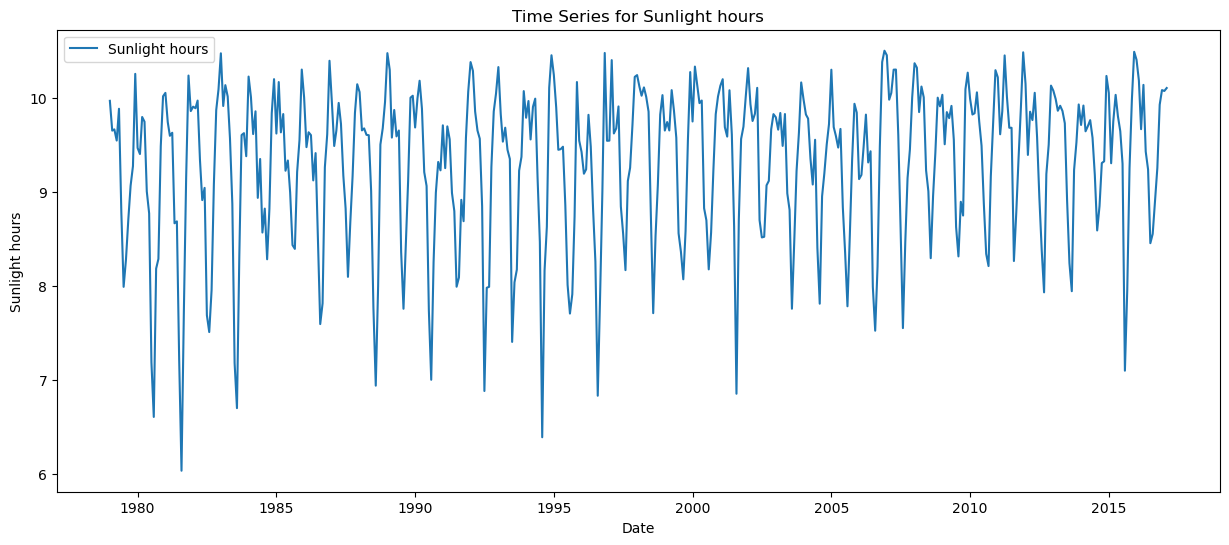

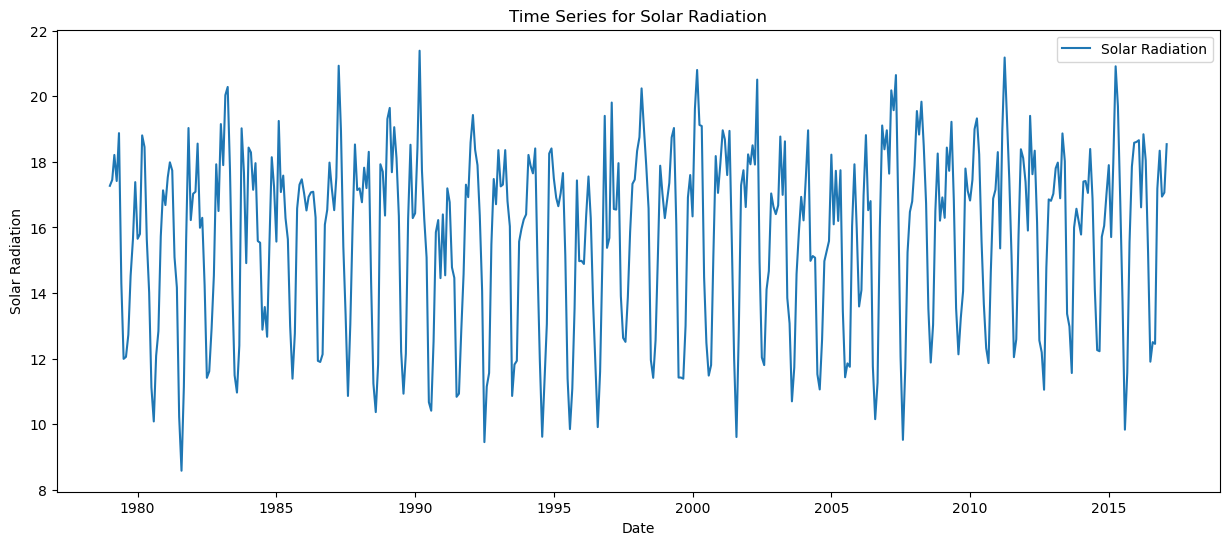

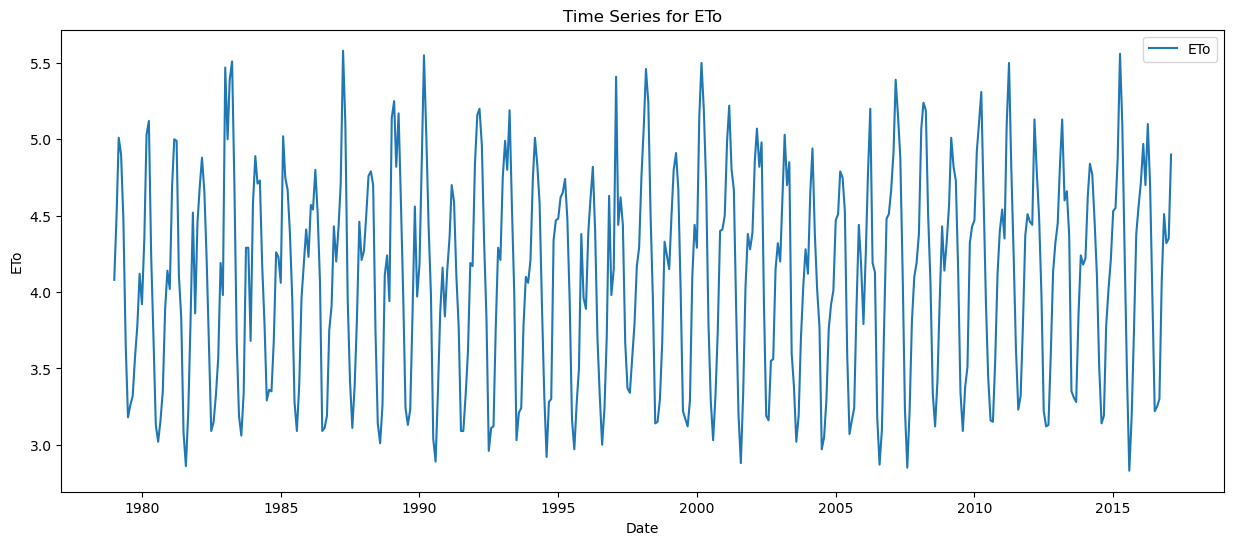

In [7]:
#Time series plot
numerical_columns = [col for col in data.columns if data[col].dtype != 'O' and col != 'date']
for feature in numerical_columns:
    plt.figure(figsize=(15, 6))
    plt.plot(data.index, data[feature], label=feature)
    plt.title(f'Time Series for {feature}')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

In [8]:
#Setting the input features and target variable

x = data[['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (274, 5)
the shape of the training set (target) is: (274,)

the shape of the cross validation set (input) is: (92, 5)
the shape of the cross validation set (target) is: (92,)

the shape of the test set (input) is: (92, 5)
the shape of the test set (target) is: (92,)


In [9]:
import Utils
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)


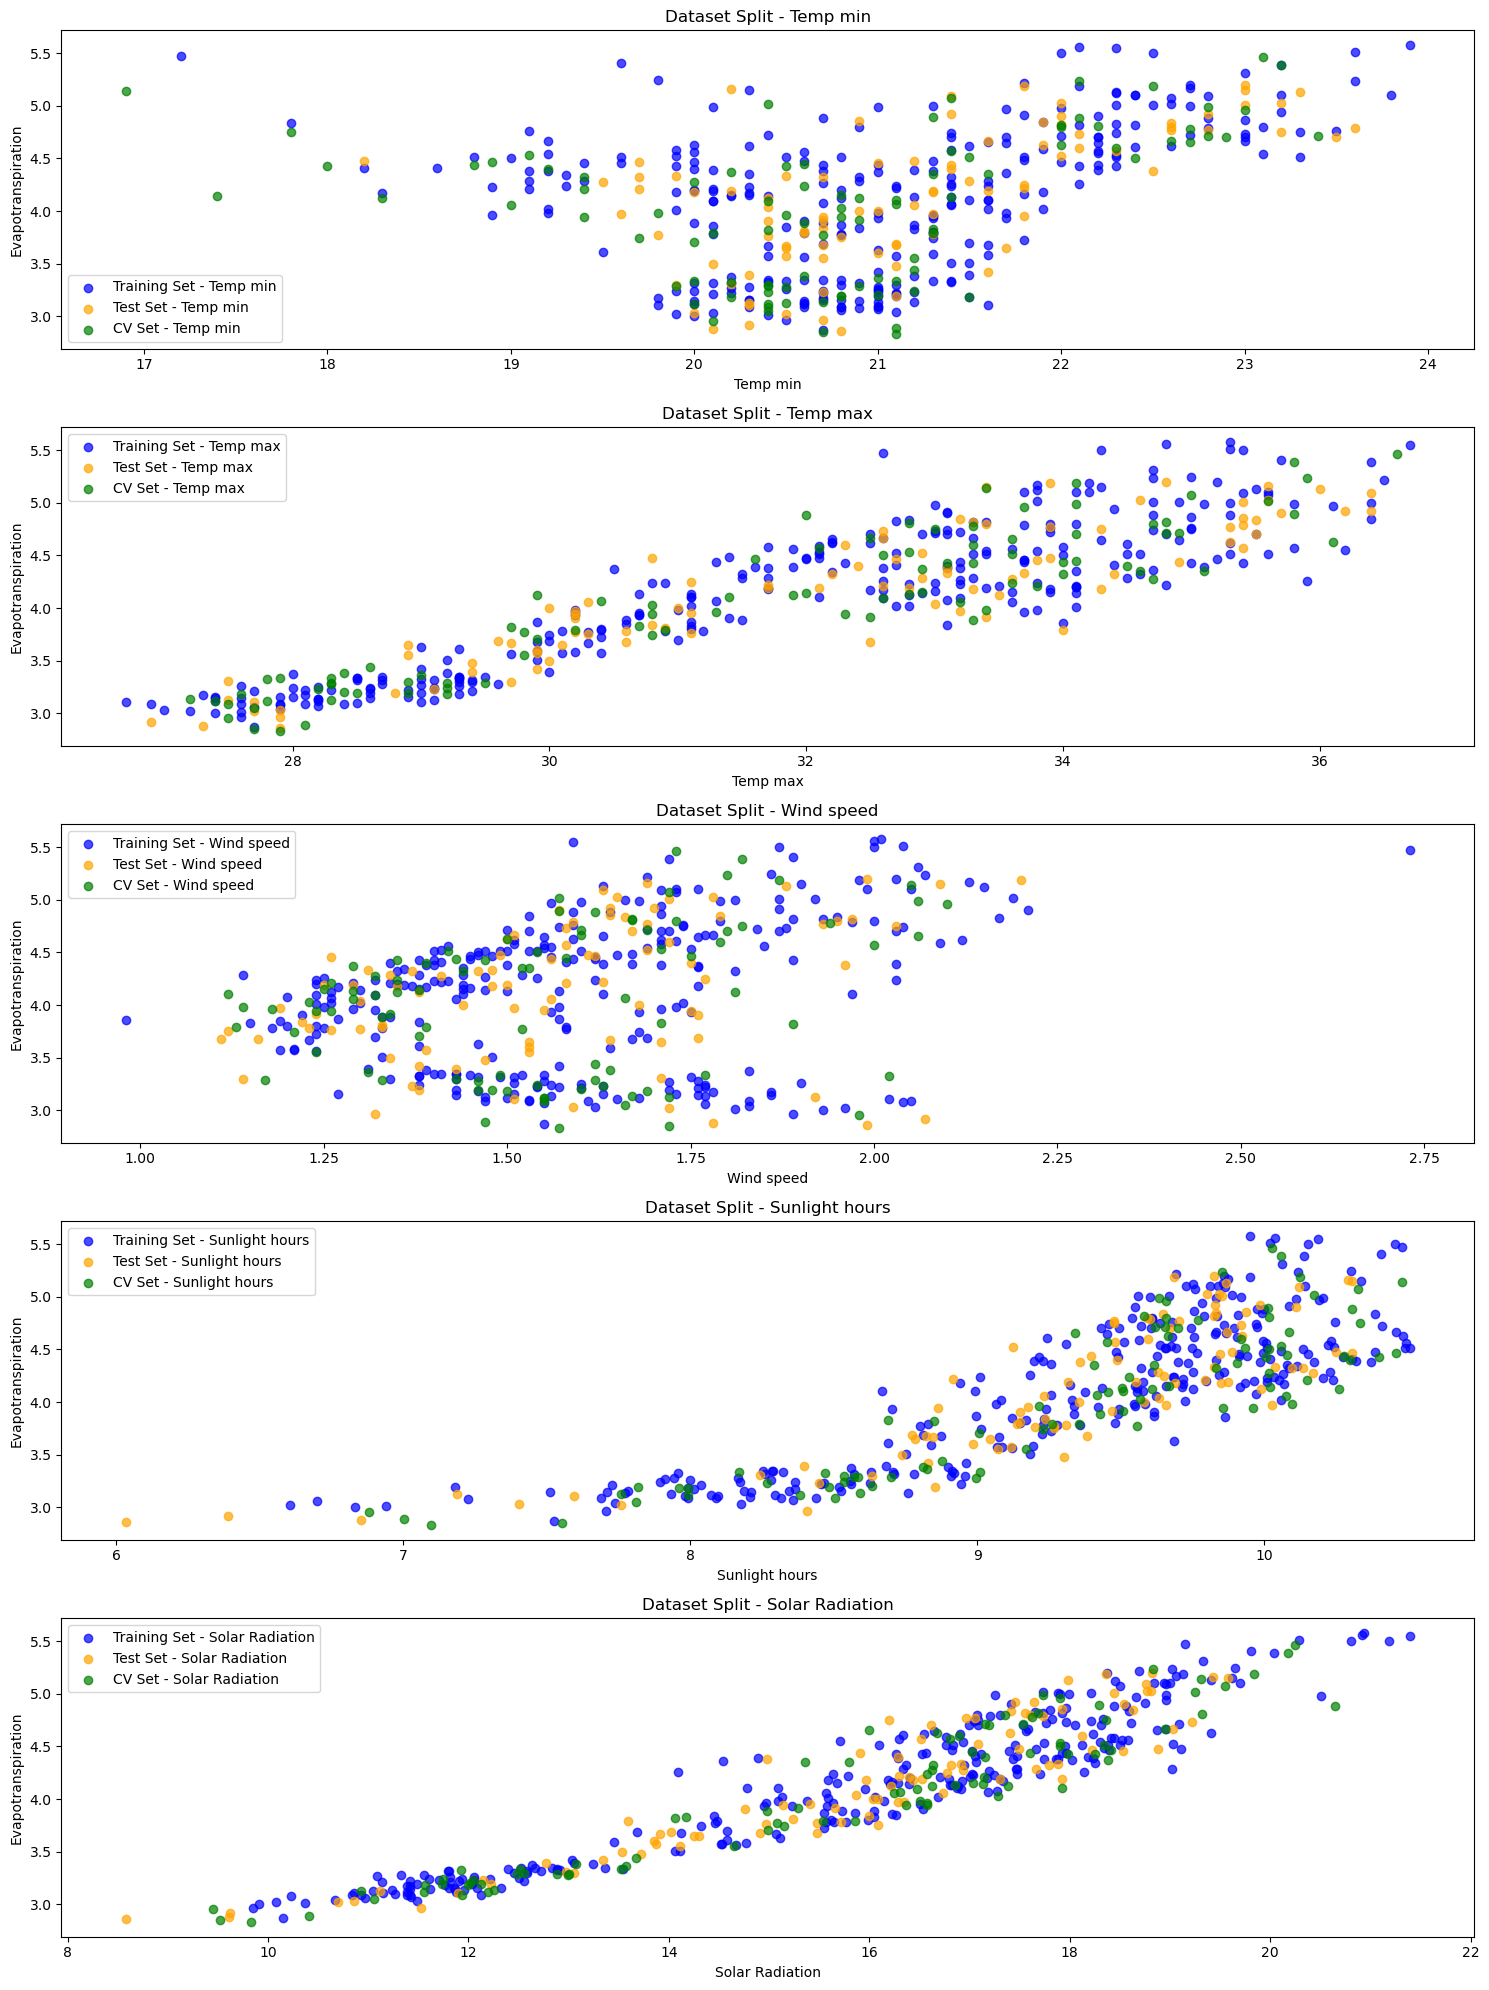

In [10]:
import numpy as np
from Utils import plot_dataset_split

features = ['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation'] 
plot_dataset_split(x_train, x_test, x_cv, y_train, y_test, y_cv, features)

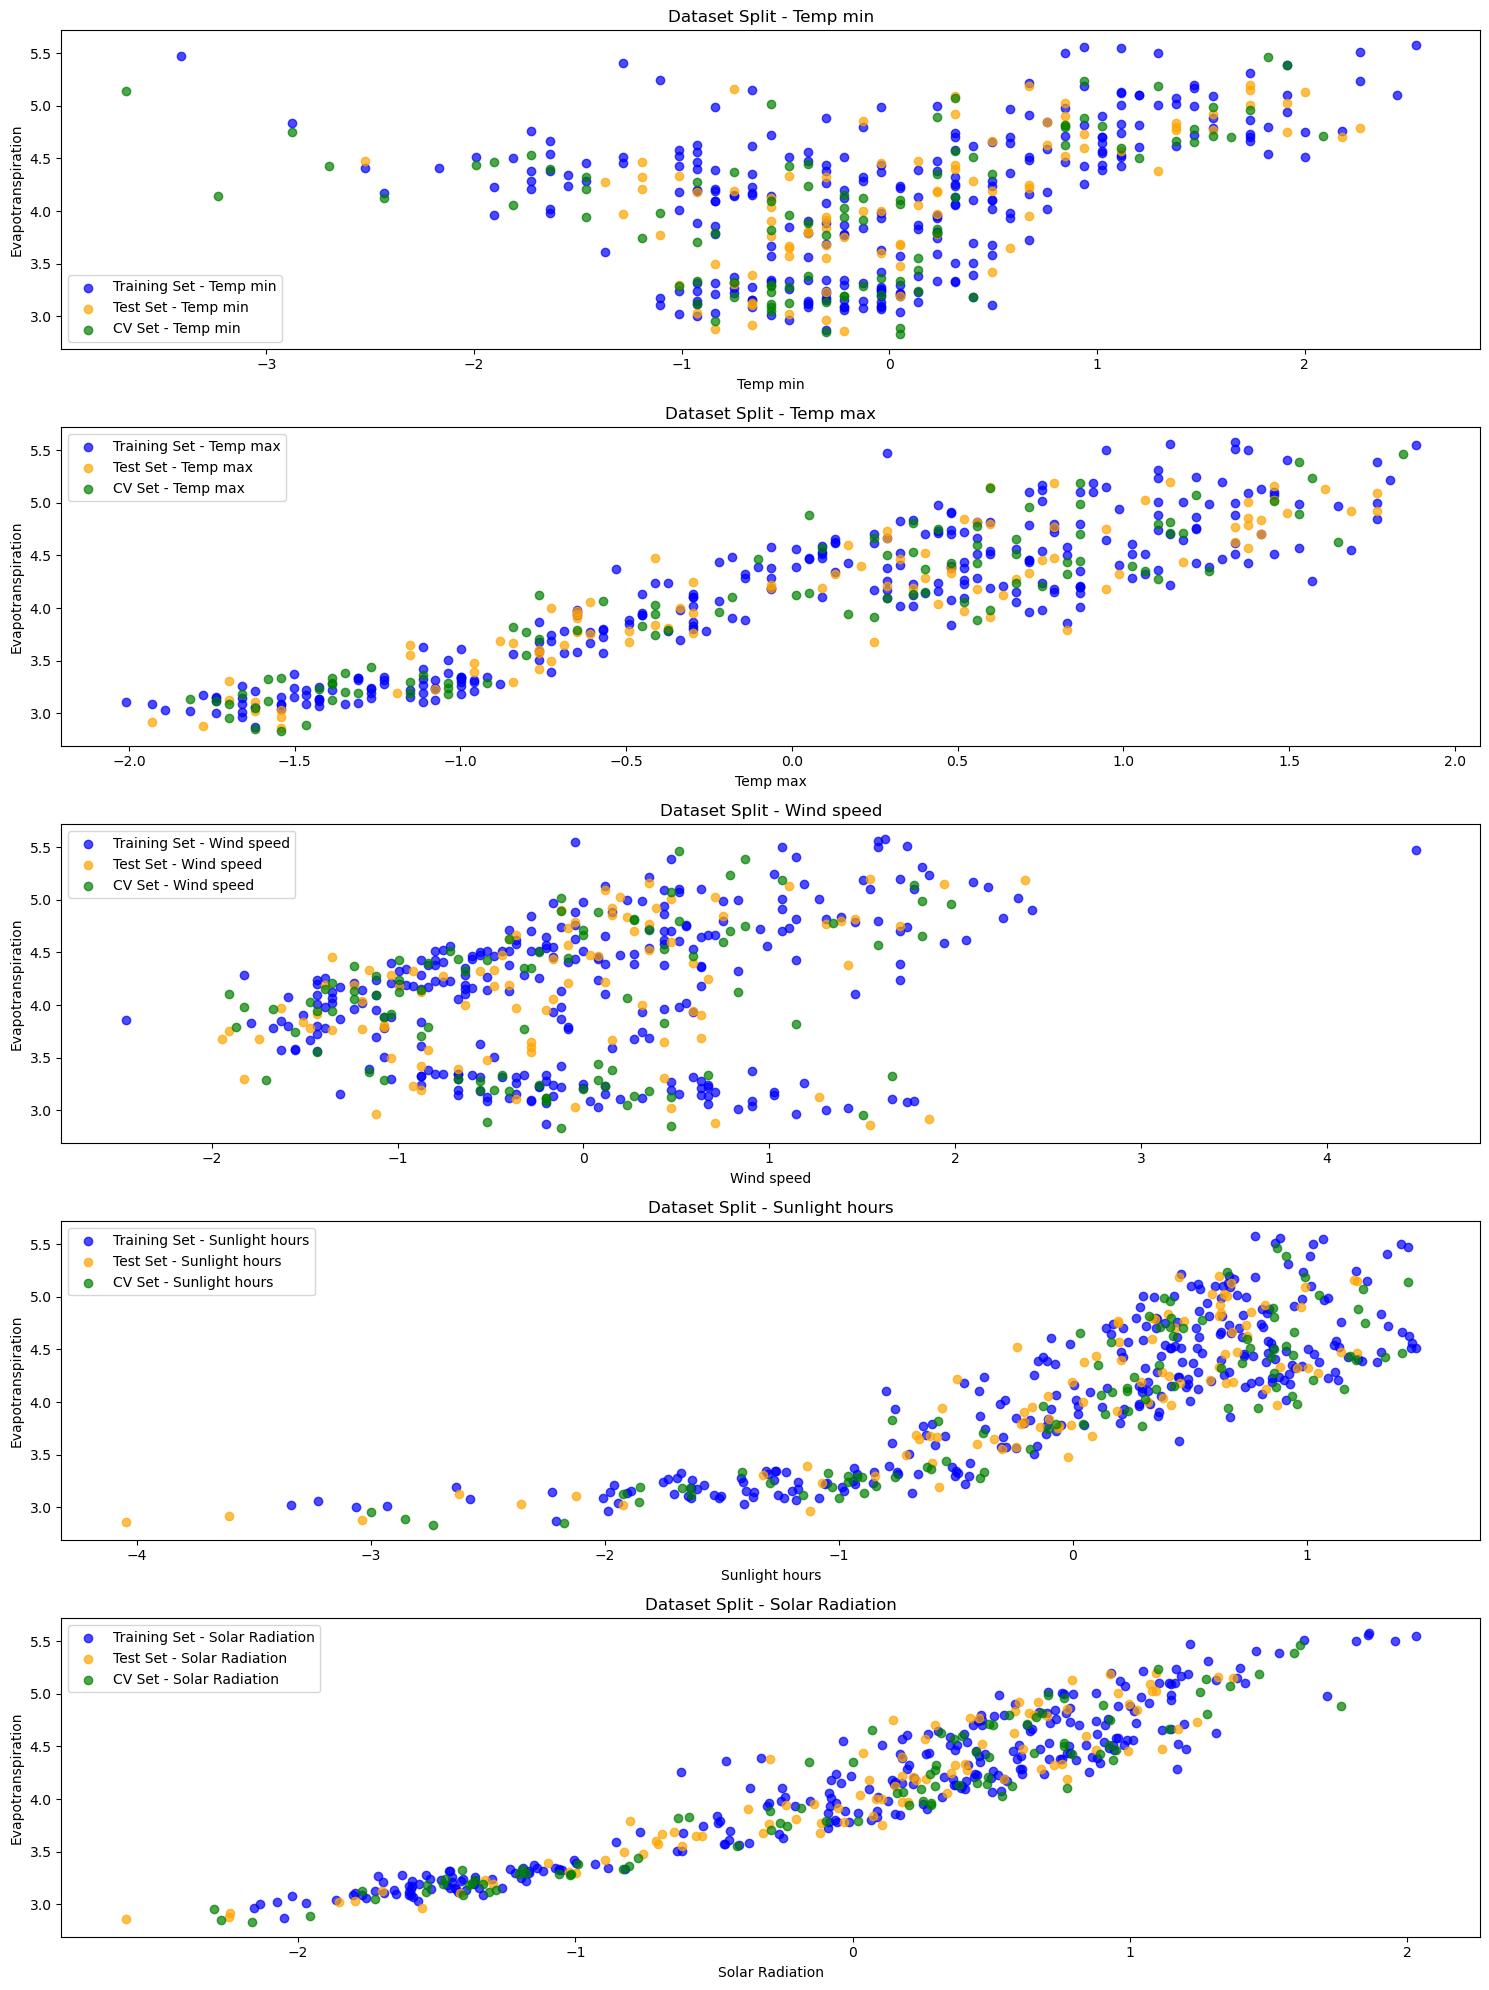

In [11]:
#Scaling the input features

np.set_printoptions(precision=2)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_cv_scaled = scaler.transform(x_cv)
x_test_scaled = scaler.transform(x_test)
plot_dataset_split(x_train_scaled, x_test_scaled, x_cv_scaled, y_train, y_test, y_cv, features)

### Neural Network Training
### Model 1: All input features

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled, y_train,
    epochs=150
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/150
9/9 [==============================] - 2s 7ms/step - loss: 19.3701 - mae: 4.3335
Epoch 2/150
9/9 [==============================] - 0s 9ms/step - loss: 18.1663 - mae: 4.1934
Epoch 3/150
9/9 [==============================] - 0s 5ms/step - loss: 17.0180 - mae: 4.0542
Epoch 4/150
9/9 [==============================] - 0s 4ms/step - loss: 15.9205 - mae: 3.9168
Epoch 5/150
9/9 [==============================] - 0s 4ms/step - loss: 14.8944 - mae: 3.7827
Epoch 6/150
9/9 [==============================] - 0s 5ms/step - loss: 13.8992 - mae: 3.6491
Epoch 7/150
9/9 [==============================] - 0s 5ms/step - loss: 12.9686 - mae: 3.5180
Epoch 8/150
9/9 [==============================] - 0s 8ms/step - loss: 12.0756 - mae: 3.3874
Epoch 9/150
9/9 [==============================] - 0s 8ms/step - loss: 11.2337 - mae: 3.2596
Epoch 10/150
9/9 [==============================] - 0s 7ms/step - loss: 10.4218 - mae: 3.1309
Epoch 11/150
9/9 [==============================] - 0s 6ms/step - los

9/9 [==============================] - 0s 6ms/step - loss: 0.3263 - mae: 0.4355
Epoch 89/150
9/9 [==============================] - 0s 5ms/step - loss: 0.3210 - mae: 0.4321
Epoch 90/150
9/9 [==============================] - 0s 5ms/step - loss: 0.3159 - mae: 0.4287
Epoch 91/150
9/9 [==============================] - 0s 5ms/step - loss: 0.3106 - mae: 0.4252
Epoch 92/150
9/9 [==============================] - 0s 5ms/step - loss: 0.3054 - mae: 0.4215
Epoch 93/150
9/9 [==============================] - 0s 4ms/step - loss: 0.3004 - mae: 0.4176
Epoch 94/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2958 - mae: 0.4140
Epoch 95/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2907 - mae: 0.4104
Epoch 96/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2860 - mae: 0.4074
Epoch 97/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2817 - mae: 0.4050
Epoch 98/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2770 - ma

9/9 [==============================] - 0s 4ms/step - loss: 4.0354 - mae: 1.8374
Epoch 26/150
9/9 [==============================] - 0s 5ms/step - loss: 3.6365 - mae: 1.7243
Epoch 27/150
9/9 [==============================] - 0s 5ms/step - loss: 3.2685 - mae: 1.6163
Epoch 28/150
9/9 [==============================] - 0s 3ms/step - loss: 2.9365 - mae: 1.5094
Epoch 29/150
9/9 [==============================] - 0s 5ms/step - loss: 2.6372 - mae: 1.4085
Epoch 30/150
9/9 [==============================] - 0s 11ms/step - loss: 2.3657 - mae: 1.3102
Epoch 31/150
9/9 [==============================] - 0s 7ms/step - loss: 2.1257 - mae: 1.2231
Epoch 32/150
9/9 [==============================] - 0s 7ms/step - loss: 1.9241 - mae: 1.1442
Epoch 33/150
9/9 [==============================] - 0s 8ms/step - loss: 1.7477 - mae: 1.0709
Epoch 34/150
9/9 [==============================] - 0s 6ms/step - loss: 1.6027 - mae: 1.0055
Epoch 35/150
9/9 [==============================] - 0s 8ms/step - loss: 1.4785 - m

Epoch 113/150
9/9 [==============================] - 0s 6ms/step - loss: 0.3108 - mae: 0.3592
Epoch 114/150
9/9 [==============================] - 0s 6ms/step - loss: 0.3054 - mae: 0.3553
Epoch 115/150
9/9 [==============================] - 0s 5ms/step - loss: 0.3000 - mae: 0.3511
Epoch 116/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2949 - mae: 0.3472
Epoch 117/150
9/9 [==============================] - 0s 6ms/step - loss: 0.2896 - mae: 0.3429
Epoch 118/150
9/9 [==============================] - 0s 6ms/step - loss: 0.2845 - mae: 0.3387
Epoch 119/150
9/9 [==============================] - 0s 6ms/step - loss: 0.2792 - mae: 0.3346
Epoch 120/150
9/9 [==============================] - 0s 6ms/step - loss: 0.2745 - mae: 0.3307
Epoch 121/150
9/9 [==============================] - 0s 6ms/step - loss: 0.2698 - mae: 0.3268
Epoch 122/150
9/9 [==============================] - 0s 6ms/step - loss: 0.2652 - mae: 0.3227
Epoch 123/150
9/9 [==============================] - 0s 4ms/

9/9 [==============================] - 0s 5ms/step - loss: 0.8983 - mae: 0.5562
Epoch 51/150
9/9 [==============================] - 0s 5ms/step - loss: 0.8830 - mae: 0.5500
Epoch 52/150
9/9 [==============================] - 0s 5ms/step - loss: 0.8683 - mae: 0.5438
Epoch 53/150
9/9 [==============================] - 0s 6ms/step - loss: 0.8537 - mae: 0.5376
Epoch 54/150
9/9 [==============================] - 0s 4ms/step - loss: 0.8390 - mae: 0.5318
Epoch 55/150
9/9 [==============================] - 0s 6ms/step - loss: 0.8249 - mae: 0.5265
Epoch 56/150
9/9 [==============================] - 0s 5ms/step - loss: 0.8110 - mae: 0.5208
Epoch 57/150
9/9 [==============================] - 0s 6ms/step - loss: 0.7982 - mae: 0.5157
Epoch 58/150
9/9 [==============================] - 0s 5ms/step - loss: 0.7837 - mae: 0.5099
Epoch 59/150
9/9 [==============================] - 0s 5ms/step - loss: 0.7700 - mae: 0.5042
Epoch 60/150
9/9 [==============================] - 0s 6ms/step - loss: 0.7577 - ma

9/9 [==============================] - 0s 4ms/step - loss: 0.1902 - mae: 0.1870
Epoch 138/150
9/9 [==============================] - 0s 5ms/step - loss: 0.1875 - mae: 0.1846
Epoch 139/150
9/9 [==============================] - 0s 7ms/step - loss: 0.1849 - mae: 0.1824
Epoch 140/150
9/9 [==============================] - 0s 4ms/step - loss: 0.1824 - mae: 0.1806
Epoch 141/150
9/9 [==============================] - 0s 4ms/step - loss: 0.1797 - mae: 0.1784
Epoch 142/150
9/9 [==============================] - 0s 8ms/step - loss: 0.1774 - mae: 0.1763
Epoch 143/150
9/9 [==============================] - 0s 11ms/step - loss: 0.1748 - mae: 0.1742
Epoch 144/150
9/9 [==============================] - 0s 5ms/step - loss: 0.1724 - mae: 0.1727
Epoch 145/150
9/9 [==============================] - 0s 5ms/step - loss: 0.1701 - mae: 0.1709
Epoch 146/150
9/9 [==============================] - 0s 5ms/step - loss: 0.1675 - mae: 0.1684
Epoch 147/150
9/9 [==============================] - 0s 6ms/step - loss: 

9/9 [==============================] - 0s 6ms/step - loss: 0.8092 - mae: 0.3880
Epoch 75/150
9/9 [==============================] - 0s 10ms/step - loss: 0.7910 - mae: 0.3813
Epoch 76/150
9/9 [==============================] - 0s 11ms/step - loss: 0.7732 - mae: 0.3745
Epoch 77/150
9/9 [==============================] - 0s 12ms/step - loss: 0.7563 - mae: 0.3677
Epoch 78/150
9/9 [==============================] - 0s 7ms/step - loss: 0.7392 - mae: 0.3608
Epoch 79/150
9/9 [==============================] - 0s 5ms/step - loss: 0.7228 - mae: 0.3542
Epoch 80/150
9/9 [==============================] - 0s 5ms/step - loss: 0.7063 - mae: 0.3478
Epoch 81/150
9/9 [==============================] - 0s 6ms/step - loss: 0.6903 - mae: 0.3414
Epoch 82/150
9/9 [==============================] - 0s 5ms/step - loss: 0.6736 - mae: 0.3345
Epoch 83/150
9/9 [==============================] - 0s 4ms/step - loss: 0.6578 - mae: 0.3279
Epoch 84/150
9/9 [==============================] - 0s 5ms/step - loss: 0.6423 -

9/9 [==============================] - 0s 5ms/step - loss: 12.6179 - mae: 3.2303
Epoch 12/150
9/9 [==============================] - 0s 5ms/step - loss: 11.8350 - mae: 3.1108
Epoch 13/150
9/9 [==============================] - 0s 5ms/step - loss: 11.0881 - mae: 2.9913
Epoch 14/150
9/9 [==============================] - 0s 5ms/step - loss: 10.3748 - mae: 2.8727
Epoch 15/150
9/9 [==============================] - 0s 5ms/step - loss: 9.6871 - mae: 2.7543
Epoch 16/150
9/9 [==============================] - 0s 6ms/step - loss: 9.0419 - mae: 2.6352
Epoch 17/150
9/9 [==============================] - 0s 5ms/step - loss: 8.4209 - mae: 2.5167
Epoch 18/150
9/9 [==============================] - 0s 4ms/step - loss: 7.8420 - mae: 2.4005
Epoch 19/150
9/9 [==============================] - 0s 6ms/step - loss: 7.3012 - mae: 2.2843
Epoch 20/150
9/9 [==============================] - 0s 5ms/step - loss: 6.8017 - mae: 2.1716
Epoch 21/150
9/9 [==============================] - 0s 5ms/step - loss: 6.3300 

9/9 [==============================] - 0s 6ms/step - loss: 0.4441 - mae: 0.1866
Epoch 100/150
9/9 [==============================] - 0s 5ms/step - loss: 0.4291 - mae: 0.1810
Epoch 101/150
9/9 [==============================] - 0s 5ms/step - loss: 0.4148 - mae: 0.1759
Epoch 102/150
9/9 [==============================] - 0s 6ms/step - loss: 0.4010 - mae: 0.1708
Epoch 103/150
9/9 [==============================] - 0s 5ms/step - loss: 0.3875 - mae: 0.1660
Epoch 104/150
9/9 [==============================] - 0s 5ms/step - loss: 0.3742 - mae: 0.1607
Epoch 105/150
9/9 [==============================] - 0s 5ms/step - loss: 0.3617 - mae: 0.1562
Epoch 106/150
9/9 [==============================] - 0s 6ms/step - loss: 0.3496 - mae: 0.1520
Epoch 107/150
9/9 [==============================] - 0s 4ms/step - loss: 0.3380 - mae: 0.1484
Epoch 108/150
9/9 [==============================] - 0s 3ms/step - loss: 0.3266 - mae: 0.1442
Epoch 109/150
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 2.6276 - mae: 0.6871
Epoch 37/150
9/9 [==============================] - 0s 6ms/step - loss: 2.5175 - mae: 0.6603
Epoch 38/150
9/9 [==============================] - 0s 4ms/step - loss: 2.4147 - mae: 0.6351
Epoch 39/150
9/9 [==============================] - 0s 5ms/step - loss: 2.3146 - mae: 0.6116
Epoch 40/150
9/9 [==============================] - 0s 5ms/step - loss: 2.2162 - mae: 0.5892
Epoch 41/150
9/9 [==============================] - 0s 4ms/step - loss: 2.1204 - mae: 0.5671
Epoch 42/150
9/9 [==============================] - 0s 6ms/step - loss: 2.0286 - mae: 0.5460
Epoch 43/150
9/9 [==============================] - 0s 10ms/step - loss: 1.9413 - mae: 0.5265
Epoch 44/150
9/9 [==============================] - 0s 7ms/step - loss: 1.8552 - mae: 0.5058
Epoch 45/150
9/9 [==============================] - 0s 5ms/step - loss: 1.7742 - mae: 0.4867
Epoch 46/150
9/9 [==============================] - 0s 6ms/step - loss: 1.6967 - m

9/9 [==============================] - 0s 7ms/step - loss: 0.0536 - mae: 0.0606
Epoch 124/150
9/9 [==============================] - 0s 5ms/step - loss: 0.0518 - mae: 0.0602
Epoch 125/150
9/9 [==============================] - 0s 5ms/step - loss: 0.0500 - mae: 0.0593
Epoch 126/150
9/9 [==============================] - 0s 5ms/step - loss: 0.0483 - mae: 0.0590
Epoch 127/150
9/9 [==============================] - 0s 7ms/step - loss: 0.0467 - mae: 0.0594
Epoch 128/150
9/9 [==============================] - 0s 9ms/step - loss: 0.0452 - mae: 0.0590
Epoch 129/150
9/9 [==============================] - 0s 5ms/step - loss: 0.0438 - mae: 0.0589
Epoch 130/150
9/9 [==============================] - 0s 6ms/step - loss: 0.0424 - mae: 0.0588
Epoch 131/150
9/9 [==============================] - 0s 5ms/step - loss: 0.0411 - mae: 0.0587
Epoch 132/150
9/9 [==============================] - 0s 4ms/step - loss: 0.0399 - mae: 0.0581
Epoch 133/150
9/9 [==============================] - 0s 5ms/step - loss: 0

### Computing the errors on the train, cross validation and test sets

In [13]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 5ms/step
RESULTS:
Model 1: Training MSE: 0.05, CV MSE: 0.07
Model 2: Training MSE: 0.04, CV MSE: 0.05
Model 3: Training MSE: 0.02, CV MSE: 0.02
Model 4: Training MSE: 0.01, CV MSE: 0.01
Model 5: Training MSE: 0.00, CV MSE: 0.00
Model 6: Training MSE: 0.00, CV MSE: 0.00


In [37]:
# Select the model with the lowest CV MSE
model_num = 5

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 6ms/step
Selected Model: 5
Training MSE: 0.00
Cross Validation MSE: 0.00
Test MSE: 0.00


In [38]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)



Actual Values  Predicted Values
0           3.95          3.929108
1           4.19          4.218500
2           3.48          3.502153
3           3.97          4.006085
4           4.00          3.955498
5           4.82          4.791277
6           4.77          4.789922

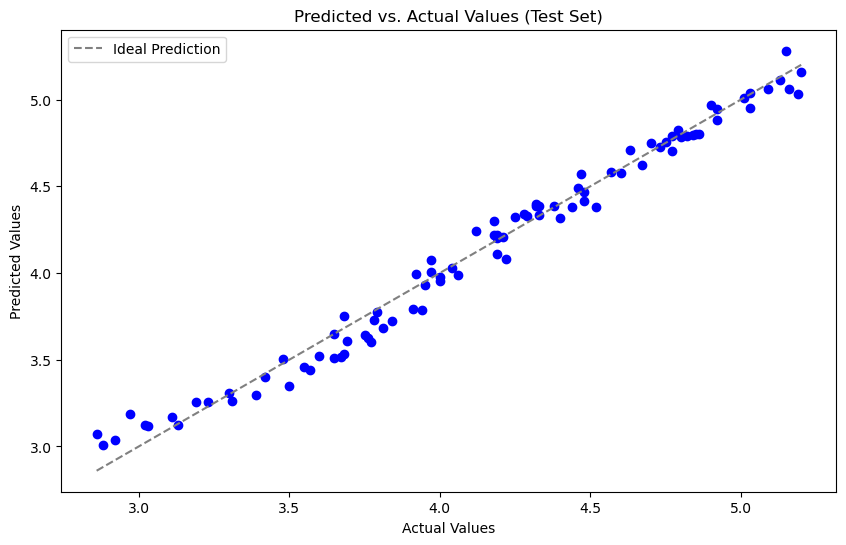

In [39]:
#Plotting the Actual values vs Predicted Value of the network

plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [40]:
#Computing various error metrics for comparative analysis

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.08514688572922308
RAE: 0.13013258896615518
MAE: 0.06830823183059692
R2: 0.981506706703447


### Neural Network Training
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

In [41]:
x_reduced = data[['Temp min', 'Temp max', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced, x_reduced, y_train, y_ = train_test_split(x_reduced, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced, x_test_reduced, y_cv, y_test = train_test_split(x_reduced, y_, test_size=0.50, random_state=1)


In [42]:
scaler = StandardScaler()
x_train_scaled_reduced = scaler.fit_transform(x_train_reduced)
x_cv_scaled__reduced = scaler.transform(x_cv_reduced)
x_test_scaled_reduced = scaler.transform(x_test_reduced)

In [43]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 2s 5ms/step - loss: 14.5534 - mae: 3.7420
Epoch 2/300
9/9 [==============================] - 0s 6ms/step - loss: 13.6790 - mae: 3.6198
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 12.8154 - mae: 3.4946
Epoch 4/300
9/9 [==============================] - 0s 5ms/step - loss: 11.9652 - mae: 3.3670
Epoch 5/300
9/9 [==============================] - 0s 5ms/step - loss: 11.1358 - mae: 3.2376
Epoch 6/300
9/9 [==============================] - 0s 5ms/step - loss: 10.3221 - mae: 3.1045
Epoch 7/300
9/9 [==============================] - 0s 6ms/step - loss: 9.5279 - mae: 2.9706
Epoch 8/300
9/9 [==============================] - 0s 7ms/step - loss: 8.7579 - mae: 2.8353
Epoch 9/300
9/9 [==============================] - 0s 5ms/step - loss: 8.0022 - mae: 2.6971
Epoch 10/300
9/9 [==============================] - 0s 6ms/step - loss: 7.2860 - mae: 2.5604
Epoch 11/300
9/9 [==============================] - 0s 18ms/step - loss: 

9/9 [==============================] - 0s 12ms/step - loss: 0.1343 - mae: 0.2913
Epoch 89/300
9/9 [==============================] - 0s 14ms/step - loss: 0.1292 - mae: 0.2848
Epoch 90/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1241 - mae: 0.2792
Epoch 91/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1193 - mae: 0.2740
Epoch 92/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1149 - mae: 0.2683
Epoch 93/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1105 - mae: 0.2627
Epoch 94/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1065 - mae: 0.2573
Epoch 95/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1026 - mae: 0.2525
Epoch 96/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0989 - mae: 0.2475
Epoch 97/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0954 - mae: 0.2431
Epoch 98/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0918 - 

9/9 [==============================] - 0s 6ms/step - loss: 0.0254 - mae: 0.1225
Epoch 176/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0254 - mae: 0.1227
Epoch 177/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0252 - mae: 0.1224
Epoch 178/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0250 - mae: 0.1218
Epoch 179/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0248 - mae: 0.1213
Epoch 180/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0247 - mae: 0.1209
Epoch 181/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0246 - mae: 0.1206
Epoch 182/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0244 - mae: 0.1203
Epoch 183/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0244 - mae: 0.1197
Epoch 184/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0242 - mae: 0.1193
Epoch 185/300
9/9 [==============================] - 0s 7ms/step - loss: 

9/9 [==============================] - 0s 6ms/step - loss: 0.0171 - mae: 0.1032
Epoch 263/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0171 - mae: 0.1030
Epoch 264/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0170 - mae: 0.1030
Epoch 265/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0169 - mae: 0.1029
Epoch 266/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0169 - mae: 0.1028
Epoch 267/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0168 - mae: 0.1028
Epoch 268/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0168 - mae: 0.1025
Epoch 269/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0168 - mae: 0.1023
Epoch 270/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0166 - mae: 0.1019
Epoch 271/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0165 - mae: 0.1015
Epoch 272/300
9/9 [==============================] - 0s 7ms/step - loss: 

9/9 [==============================] - 0s 6ms/step - loss: 0.8676 - mae: 0.7022
Epoch 50/300
9/9 [==============================] - 0s 5ms/step - loss: 0.8480 - mae: 0.6942
Epoch 51/300
9/9 [==============================] - 0s 10ms/step - loss: 0.8280 - mae: 0.6856
Epoch 52/300
9/9 [==============================] - 0s 6ms/step - loss: 0.8104 - mae: 0.6783
Epoch 53/300
9/9 [==============================] - 0s 5ms/step - loss: 0.7923 - mae: 0.6704
Epoch 54/300
9/9 [==============================] - 0s 8ms/step - loss: 0.7749 - mae: 0.6626
Epoch 55/300
9/9 [==============================] - 0s 6ms/step - loss: 0.7571 - mae: 0.6547
Epoch 56/300
9/9 [==============================] - 0s 5ms/step - loss: 0.7405 - mae: 0.6471
Epoch 57/300
9/9 [==============================] - 0s 6ms/step - loss: 0.7235 - mae: 0.6392
Epoch 58/300
9/9 [==============================] - 0s 6ms/step - loss: 0.7080 - mae: 0.6319
Epoch 59/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6920 - m

9/9 [==============================] - 0s 8ms/step - loss: 0.1219 - mae: 0.1823
Epoch 137/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1202 - mae: 0.1798
Epoch 138/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1186 - mae: 0.1776
Epoch 139/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1169 - mae: 0.1752
Epoch 140/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1154 - mae: 0.1732
Epoch 141/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1139 - mae: 0.1711
Epoch 142/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1126 - mae: 0.1693
Epoch 143/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1112 - mae: 0.1676
Epoch 144/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1099 - mae: 0.1657
Epoch 145/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1086 - mae: 0.1639
Epoch 146/300
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 10ms/step - loss: 0.0656 - mae: 0.1154
Epoch 224/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0653 - mae: 0.1151
Epoch 225/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0650 - mae: 0.1149
Epoch 226/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0647 - mae: 0.1146
Epoch 227/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0644 - mae: 0.1143
Epoch 228/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0641 - mae: 0.1142
Epoch 229/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0638 - mae: 0.1140
Epoch 230/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0634 - mae: 0.1134
Epoch 231/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0632 - mae: 0.1134
Epoch 232/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0628 - mae: 0.1128
Epoch 233/300
9/9 [==============================] - 0s 5ms/step - loss:

9/9 [==============================] - 0s 7ms/step - loss: 11.8337 - mae: 3.3720
Epoch 11/300
9/9 [==============================] - 0s 6ms/step - loss: 11.1736 - mae: 3.2698
Epoch 12/300
9/9 [==============================] - 0s 5ms/step - loss: 10.5360 - mae: 3.1669
Epoch 13/300
9/9 [==============================] - 0s 6ms/step - loss: 9.9212 - mae: 3.0644
Epoch 14/300
9/9 [==============================] - 0s 6ms/step - loss: 9.3230 - mae: 2.9612
Epoch 15/300
9/9 [==============================] - 0s 6ms/step - loss: 8.7494 - mae: 2.8571
Epoch 16/300
9/9 [==============================] - 0s 5ms/step - loss: 8.1965 - mae: 2.7525
Epoch 17/300
9/9 [==============================] - 0s 15ms/step - loss: 7.6672 - mae: 2.6487
Epoch 18/300
9/9 [==============================] - 0s 5ms/step - loss: 7.1569 - mae: 2.5444
Epoch 19/300
9/9 [==============================] - 0s 6ms/step - loss: 6.6677 - mae: 2.4397
Epoch 20/300
9/9 [==============================] - 0s 8ms/step - loss: 6.1954 

9/9 [==============================] - 0s 6ms/step - loss: 0.3704 - mae: 0.3398
Epoch 99/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3622 - mae: 0.3334
Epoch 100/300
9/9 [==============================] - 0s 6ms/step - loss: 0.3546 - mae: 0.3269
Epoch 101/300
9/9 [==============================] - 0s 6ms/step - loss: 0.3470 - mae: 0.3206
Epoch 102/300
9/9 [==============================] - 0s 8ms/step - loss: 0.3396 - mae: 0.3144
Epoch 103/300
9/9 [==============================] - 0s 10ms/step - loss: 0.3326 - mae: 0.3091
Epoch 104/300
9/9 [==============================] - 0s 9ms/step - loss: 0.3257 - mae: 0.3032
Epoch 105/300
9/9 [==============================] - 0s 6ms/step - loss: 0.3191 - mae: 0.2976
Epoch 106/300
9/9 [==============================] - 0s 6ms/step - loss: 0.3126 - mae: 0.2912
Epoch 107/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3064 - mae: 0.2856
Epoch 108/300
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 0.1149 - mae: 0.1172
Epoch 186/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1140 - mae: 0.1166
Epoch 187/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1130 - mae: 0.1159
Epoch 188/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1121 - mae: 0.1152
Epoch 189/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1112 - mae: 0.1147
Epoch 190/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1103 - mae: 0.1142
Epoch 191/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1094 - mae: 0.1136
Epoch 192/300
9/9 [==============================] - 0s 9ms/step - loss: 0.1085 - mae: 0.1132
Epoch 193/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1077 - mae: 0.1129
Epoch 194/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1069 - mae: 0.1129
Epoch 195/300
9/9 [==============================] - 0s 8ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.0616 - mae: 0.1001
Epoch 273/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0612 - mae: 0.1001
Epoch 274/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0608 - mae: 0.1002
Epoch 275/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0604 - mae: 0.1000
Epoch 276/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0600 - mae: 0.1000
Epoch 277/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0597 - mae: 0.1001
Epoch 278/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0593 - mae: 0.1000
Epoch 279/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0589 - mae: 0.0999
Epoch 280/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0586 - mae: 0.0999
Epoch 281/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0582 - mae: 0.0999
Epoch 282/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 1.0356 - mae: 0.5391
Epoch 60/300
9/9 [==============================] - 0s 4ms/step - loss: 0.9986 - mae: 0.5240
Epoch 61/300
9/9 [==============================] - 0s 5ms/step - loss: 0.9625 - mae: 0.5093
Epoch 62/300
9/9 [==============================] - 0s 4ms/step - loss: 0.9288 - mae: 0.4953
Epoch 63/300
9/9 [==============================] - 0s 6ms/step - loss: 0.8944 - mae: 0.4805
Epoch 64/300
9/9 [==============================] - 0s 5ms/step - loss: 0.8628 - mae: 0.4663
Epoch 65/300
9/9 [==============================] - 0s 7ms/step - loss: 0.8312 - mae: 0.4520
Epoch 66/300
9/9 [==============================] - 0s 6ms/step - loss: 0.8006 - mae: 0.4380
Epoch 67/300
9/9 [==============================] - 0s 5ms/step - loss: 0.7727 - mae: 0.4247
Epoch 68/300
9/9 [==============================] - 0s 8ms/step - loss: 0.7444 - mae: 0.4106
Epoch 69/300
9/9 [==============================] - 0s 11ms/step - loss: 0.7177 - m

9/9 [==============================] - 0s 9ms/step - loss: 0.1172 - mae: 0.1180
Epoch 147/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1154 - mae: 0.1179
Epoch 148/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1135 - mae: 0.1174
Epoch 149/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1117 - mae: 0.1172
Epoch 150/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1100 - mae: 0.1172
Epoch 151/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1081 - mae: 0.1171
Epoch 152/300
9/9 [==============================] - 0s 9ms/step - loss: 0.1065 - mae: 0.1172
Epoch 153/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1049 - mae: 0.1173
Epoch 154/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1034 - mae: 0.1174
Epoch 155/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1017 - mae: 0.1172
Epoch 156/300
9/9 [==============================] - 0s 11ms/step - loss: 

9/9 [==============================] - 0s 4ms/step - loss: 0.0405 - mae: 0.1138
Epoch 234/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0402 - mae: 0.1140
Epoch 235/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0399 - mae: 0.1136
Epoch 236/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0397 - mae: 0.1139
Epoch 237/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0394 - mae: 0.1143
Epoch 238/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0392 - mae: 0.1142
Epoch 239/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0391 - mae: 0.1150
Epoch 240/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0388 - mae: 0.1145
Epoch 241/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0386 - mae: 0.1137
Epoch 242/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0384 - mae: 0.1137
Epoch 243/300
9/9 [==============================] - 0s 5ms/step - loss: 

9/9 [==============================] - 0s 4ms/step - loss: 5.4621 - mae: 1.8975
Epoch 21/300
9/9 [==============================] - 0s 5ms/step - loss: 5.0962 - mae: 1.7832
Epoch 22/300
9/9 [==============================] - 0s 5ms/step - loss: 4.7601 - mae: 1.6706
Epoch 23/300
9/9 [==============================] - 0s 5ms/step - loss: 4.4677 - mae: 1.5697
Epoch 24/300
9/9 [==============================] - 0s 6ms/step - loss: 4.2048 - mae: 1.4781
Epoch 25/300
9/9 [==============================] - 0s 6ms/step - loss: 3.9732 - mae: 1.3915
Epoch 26/300
9/9 [==============================] - 0s 6ms/step - loss: 3.7699 - mae: 1.3169
Epoch 27/300
9/9 [==============================] - 0s 8ms/step - loss: 3.5916 - mae: 1.2481
Epoch 28/300
9/9 [==============================] - 0s 7ms/step - loss: 3.4322 - mae: 1.1857
Epoch 29/300
9/9 [==============================] - 0s 6ms/step - loss: 3.2924 - mae: 1.1298
Epoch 30/300
9/9 [==============================] - 0s 4ms/step - loss: 3.1656 - ma

9/9 [==============================] - 0s 13ms/step - loss: 0.2040 - mae: 0.1313
Epoch 109/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1989 - mae: 0.1296
Epoch 110/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1942 - mae: 0.1283
Epoch 111/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1896 - mae: 0.1270
Epoch 112/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1850 - mae: 0.1259
Epoch 113/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1806 - mae: 0.1247
Epoch 114/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1764 - mae: 0.1236
Epoch 115/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1723 - mae: 0.1228
Epoch 116/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1684 - mae: 0.1220
Epoch 117/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1646 - mae: 0.1212
Epoch 118/300
9/9 [==============================] - 0s 5ms/step - loss: 

9/9 [==============================] - 0s 5ms/step - loss: 0.0524 - mae: 0.1206
Epoch 196/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0520 - mae: 0.1206
Epoch 197/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0516 - mae: 0.1207
Epoch 198/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0512 - mae: 0.1211
Epoch 199/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0509 - mae: 0.1211
Epoch 200/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0506 - mae: 0.1208
Epoch 201/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0501 - mae: 0.1205
Epoch 202/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0496 - mae: 0.1210
Epoch 203/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0493 - mae: 0.1219
Epoch 204/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0490 - mae: 0.1222
Epoch 205/300
9/9 [==============================] - 0s 5ms/step - loss:

9/9 [==============================] - 0s 4ms/step - loss: 0.0384 - mae: 0.1212
Epoch 283/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0381 - mae: 0.1212
Epoch 284/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0383 - mae: 0.1223
Epoch 285/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0381 - mae: 0.1215
Epoch 286/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0384 - mae: 0.1208
Epoch 287/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0383 - mae: 0.1215
Epoch 288/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0380 - mae: 0.1221
Epoch 289/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0383 - mae: 0.1213
Epoch 290/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0379 - mae: 0.1211
Epoch 291/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0379 - mae: 0.1219
Epoch 292/300
9/9 [==============================] - 0s 6ms/step - loss:

9/9 [==============================] - 0s 8ms/step - loss: 0.5618 - mae: 0.2353
Epoch 70/300
9/9 [==============================] - 0s 6ms/step - loss: 0.5358 - mae: 0.2259
Epoch 71/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5104 - mae: 0.2165
Epoch 72/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4869 - mae: 0.2081
Epoch 73/300
9/9 [==============================] - 0s 7ms/step - loss: 0.4643 - mae: 0.1995
Epoch 74/300
9/9 [==============================] - 0s 7ms/step - loss: 0.4430 - mae: 0.1914
Epoch 75/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4229 - mae: 0.1842
Epoch 76/300
9/9 [==============================] - 0s 7ms/step - loss: 0.4037 - mae: 0.1771
Epoch 77/300
9/9 [==============================] - 0s 8ms/step - loss: 0.3854 - mae: 0.1702
Epoch 78/300
9/9 [==============================] - 0s 7ms/step - loss: 0.3683 - mae: 0.1636
Epoch 79/300
9/9 [==============================] - 0s 9ms/step - loss: 0.3520 - ma

9/9 [==============================] - 0s 6ms/step - loss: 0.0531 - mae: 0.1316
Epoch 157/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0528 - mae: 0.1316
Epoch 158/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0523 - mae: 0.1316
Epoch 159/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0519 - mae: 0.1316
Epoch 160/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0515 - mae: 0.1316
Epoch 161/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0513 - mae: 0.1320
Epoch 162/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0508 - mae: 0.1320
Epoch 163/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0505 - mae: 0.1321
Epoch 164/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0504 - mae: 0.1322
Epoch 165/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0500 - mae: 0.1324
Epoch 166/300
9/9 [==============================] - 0s 7ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.0430 - mae: 0.1325
Epoch 244/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0432 - mae: 0.1321
Epoch 245/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0430 - mae: 0.1314
Epoch 246/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0432 - mae: 0.1317
Epoch 247/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0430 - mae: 0.1325
Epoch 248/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0430 - mae: 0.1320
Epoch 249/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0430 - mae: 0.1321
Epoch 250/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0429 - mae: 0.1318
Epoch 251/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0431 - mae: 0.1315
Epoch 252/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0429 - mae: 0.1316
Epoch 253/300
9/9 [==============================] - 0s 5ms/step - loss: 

In [44]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 3ms/step
RESULTS:
Model 1: Training MSE: 0.01, CV MSE: 0.01
Model 2: Training MSE: 0.01, CV MSE: 0.01
Model 3: Training MSE: 0.01, CV MSE: 0.01
Model 4: Training MSE: 0.01, CV MSE: 0.01
Model 5: Training MSE: 0.01, CV MSE: 0.01
Model 6: Training MSE: 0.01, CV MSE: 0.01


In [45]:
# Select the model with the lowest CV MSE
model_num = 2

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 4ms/step
Selected Model: 2
Training MSE: 0.01
Cross Validation MSE: 0.01
Test MSE: 0.01


In [46]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame to compare the results of the prediction to the actual value
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.95          3.990546
1           4.19          4.406243
2           3.48          3.476762
3           3.97          4.034287
4           4.00          3.892996
5           4.82          4.577189
6           4.77          4.688042

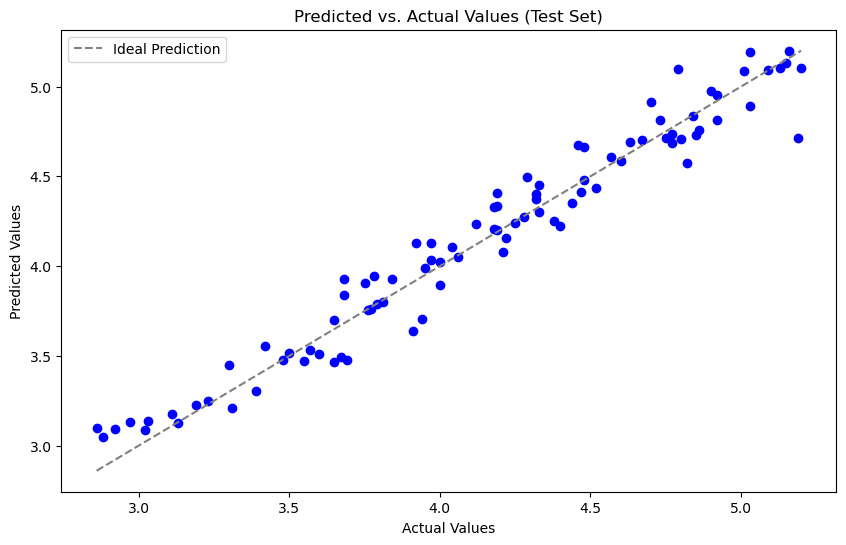

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1324867801067985
RAE: 0.19440279187996543
MAE: 0.10204446927360862
R2: 0.9552264209463864


### Neural Network Training
### Model 3: Three input features: Temp max, Sun hours and Solar rad

In [49]:
x_reduced2 = data[['Temp max', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced2, x_reduced2, y_train, y_ = train_test_split(x_reduced2, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced2, x_test_reduced2, y_cv, y_test = train_test_split(x_reduced2, y_, test_size=0.50, random_state=1)


In [50]:
scaler = StandardScaler()
x_train_scaled_reduced2 = scaler.fit_transform(x_train_reduced2)
x_cv_scaled__reduced2 = scaler.transform(x_cv_reduced2)
x_test_scaled_reduced2 = scaler.transform(x_test_reduced2)

In [51]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced2, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 1s 4ms/step - loss: 18.6137 - mae: 4.2517
Epoch 2/300
9/9 [==============================] - 0s 7ms/step - loss: 17.6759 - mae: 4.1429
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 16.7859 - mae: 4.0376
Epoch 4/300
9/9 [==============================] - 0s 6ms/step - loss: 15.9442 - mae: 3.9342
Epoch 5/300
9/9 [==============================] - 0s 6ms/step - loss: 15.1431 - mae: 3.8339
Epoch 6/300
9/9 [==============================] - 0s 5ms/step - loss: 14.3531 - mae: 3.7319
Epoch 7/300
9/9 [==============================] - 0s 6ms/step - loss: 13.5754 - mae: 3.6285
Epoch 8/300
9/9 [==============================] - 0s 5ms/step - loss: 12.8110 - mae: 3.5231
Epoch 9/300
9/9 [==============================] - 0s 6ms/step - loss: 12.0451 - mae: 3.4142
Epoch 10/300
9/9 [==============================] - 0s 6ms/step - loss: 11.2901 - mae: 3.3029
Epoch 11/300
9/9 [==============================] - 0s 14ms/step - lo

9/9 [==============================] - 0s 6ms/step - loss: 0.3116 - mae: 0.4468
Epoch 89/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2968 - mae: 0.4346
Epoch 90/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2822 - mae: 0.4232
Epoch 91/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2683 - mae: 0.4116
Epoch 92/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2560 - mae: 0.4013
Epoch 93/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2434 - mae: 0.3908
Epoch 94/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2323 - mae: 0.3812
Epoch 95/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2219 - mae: 0.3723
Epoch 96/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2113 - mae: 0.3632
Epoch 97/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2024 - mae: 0.3553
Epoch 98/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1936 - ma

9/9 [==============================] - 0s 6ms/step - loss: 0.0285 - mae: 0.1316
Epoch 176/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0282 - mae: 0.1309
Epoch 177/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0281 - mae: 0.1306
Epoch 178/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0279 - mae: 0.1302
Epoch 179/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0276 - mae: 0.1296
Epoch 180/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0275 - mae: 0.1292
Epoch 181/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0273 - mae: 0.1289
Epoch 182/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0271 - mae: 0.1282
Epoch 183/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0270 - mae: 0.1276
Epoch 184/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0268 - mae: 0.1273
Epoch 185/300
9/9 [==============================] - 0s 7ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.0228 - mae: 0.1141
Epoch 263/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0228 - mae: 0.1141
Epoch 264/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0228 - mae: 0.1141
Epoch 265/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0228 - mae: 0.1141
Epoch 266/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0227 - mae: 0.1139
Epoch 267/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0227 - mae: 0.1137
Epoch 268/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0227 - mae: 0.1137
Epoch 269/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0227 - mae: 0.1138
Epoch 270/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0227 - mae: 0.1140
Epoch 271/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0226 - mae: 0.1136
Epoch 272/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 16ms/step - loss: 1.0381 - mae: 0.7868
Epoch 50/300
9/9 [==============================] - 0s 8ms/step - loss: 1.0104 - mae: 0.7759
Epoch 51/300
9/9 [==============================] - 0s 10ms/step - loss: 0.9841 - mae: 0.7648
Epoch 52/300
9/9 [==============================] - 0s 11ms/step - loss: 0.9575 - mae: 0.7539
Epoch 53/300
9/9 [==============================] - 0s 8ms/step - loss: 0.9326 - mae: 0.7431
Epoch 54/300
9/9 [==============================] - 0s 10ms/step - loss: 0.9065 - mae: 0.7322
Epoch 55/300
9/9 [==============================] - 0s 9ms/step - loss: 0.8810 - mae: 0.7213
Epoch 56/300
9/9 [==============================] - 0s 8ms/step - loss: 0.8562 - mae: 0.7103
Epoch 57/300
9/9 [==============================] - 0s 6ms/step - loss: 0.8322 - mae: 0.6997
Epoch 58/300
9/9 [==============================] - 0s 5ms/step - loss: 0.8088 - mae: 0.6891
Epoch 59/300
9/9 [==============================] - 0s 5ms/step - loss: 0.7841 

9/9 [==============================] - 0s 7ms/step - loss: 0.0973 - mae: 0.1644
Epoch 137/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0965 - mae: 0.1636
Epoch 138/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0957 - mae: 0.1628
Epoch 139/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0950 - mae: 0.1620
Epoch 140/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0943 - mae: 0.1608
Epoch 141/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0936 - mae: 0.1599
Epoch 142/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0931 - mae: 0.1593
Epoch 143/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0922 - mae: 0.1579
Epoch 144/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0917 - mae: 0.1570
Epoch 145/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0912 - mae: 0.1562
Epoch 146/300
9/9 [==============================] - 0s 6ms/step - loss: 

9/9 [==============================] - 0s 5ms/step - loss: 0.0653 - mae: 0.1255
Epoch 224/300
9/9 [==============================] - 0s 14ms/step - loss: 0.0650 - mae: 0.1248
Epoch 225/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0648 - mae: 0.1246
Epoch 226/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0646 - mae: 0.1245
Epoch 227/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0644 - mae: 0.1246
Epoch 228/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0641 - mae: 0.1241
Epoch 229/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0639 - mae: 0.1242
Epoch 230/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0637 - mae: 0.1245
Epoch 231/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0634 - mae: 0.1237
Epoch 232/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0634 - mae: 0.1239
Epoch 233/300
9/9 [==============================] - 0s 7ms/step - loss: 

9/9 [==============================] - 0s 7ms/step - loss: 8.7061 - mae: 2.7659
Epoch 11/300
9/9 [==============================] - 0s 4ms/step - loss: 8.0989 - mae: 2.6503
Epoch 12/300
9/9 [==============================] - 0s 9ms/step - loss: 7.5044 - mae: 2.5373
Epoch 13/300
9/9 [==============================] - 0s 5ms/step - loss: 6.9409 - mae: 2.4251
Epoch 14/300
9/9 [==============================] - 0s 8ms/step - loss: 6.4003 - mae: 2.3174
Epoch 15/300
9/9 [==============================] - 0s 6ms/step - loss: 5.8905 - mae: 2.2138
Epoch 16/300
9/9 [==============================] - 0s 6ms/step - loss: 5.3859 - mae: 2.1064
Epoch 17/300
9/9 [==============================] - 0s 6ms/step - loss: 4.9141 - mae: 2.0022
Epoch 18/300
9/9 [==============================] - 0s 6ms/step - loss: 4.4594 - mae: 1.8957
Epoch 19/300
9/9 [==============================] - 0s 6ms/step - loss: 4.0407 - mae: 1.7919
Epoch 20/300
9/9 [==============================] - 0s 9ms/step - loss: 3.6473 - ma

9/9 [==============================] - 0s 6ms/step - loss: 0.2028 - mae: 0.2211
Epoch 99/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1995 - mae: 0.2172
Epoch 100/300
9/9 [==============================] - 0s 9ms/step - loss: 0.1966 - mae: 0.2135
Epoch 101/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1937 - mae: 0.2103
Epoch 102/300
9/9 [==============================] - 0s 9ms/step - loss: 0.1910 - mae: 0.2069
Epoch 103/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1884 - mae: 0.2047
Epoch 104/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1858 - mae: 0.2015
Epoch 105/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1833 - mae: 0.1982
Epoch 106/300
9/9 [==============================] - 0s 11ms/step - loss: 0.1809 - mae: 0.1956
Epoch 107/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1785 - mae: 0.1928
Epoch 108/300
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 10ms/step - loss: 0.0970 - mae: 0.1281
Epoch 186/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0962 - mae: 0.1276
Epoch 187/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0958 - mae: 0.1283
Epoch 188/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0951 - mae: 0.1283
Epoch 189/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0945 - mae: 0.1277
Epoch 190/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0941 - mae: 0.1272
Epoch 191/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0934 - mae: 0.1269
Epoch 192/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0927 - mae: 0.1267
Epoch 193/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0922 - mae: 0.1273
Epoch 194/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0916 - mae: 0.1268
Epoch 195/300
9/9 [==============================] - 0s 6ms/step - loss

9/9 [==============================] - 0s 8ms/step - loss: 0.0572 - mae: 0.1169
Epoch 273/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0569 - mae: 0.1171
Epoch 274/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0565 - mae: 0.1169
Epoch 275/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0562 - mae: 0.1162
Epoch 276/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0559 - mae: 0.1165
Epoch 277/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0556 - mae: 0.1165
Epoch 278/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0552 - mae: 0.1163
Epoch 279/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0550 - mae: 0.1162
Epoch 280/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0546 - mae: 0.1159
Epoch 281/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0544 - mae: 0.1158
Epoch 282/300
9/9 [==============================] - 0s 10ms/step - loss: 

9/9 [==============================] - 0s 6ms/step - loss: 1.0000 - mae: 0.5750
Epoch 60/300
9/9 [==============================] - 0s 5ms/step - loss: 0.9645 - mae: 0.5593
Epoch 61/300
9/9 [==============================] - 0s 5ms/step - loss: 0.9311 - mae: 0.5449
Epoch 62/300
9/9 [==============================] - 0s 5ms/step - loss: 0.8976 - mae: 0.5297
Epoch 63/300
9/9 [==============================] - 0s 7ms/step - loss: 0.8646 - mae: 0.5137
Epoch 64/300
9/9 [==============================] - 0s 6ms/step - loss: 0.8336 - mae: 0.4988
Epoch 65/300
9/9 [==============================] - 0s 11ms/step - loss: 0.8017 - mae: 0.4825
Epoch 66/300
9/9 [==============================] - 0s 6ms/step - loss: 0.7722 - mae: 0.4677
Epoch 67/300
9/9 [==============================] - 0s 4ms/step - loss: 0.7444 - mae: 0.4529
Epoch 68/300
9/9 [==============================] - 0s 5ms/step - loss: 0.7180 - mae: 0.4392
Epoch 69/300
9/9 [==============================] - 0s 4ms/step - loss: 0.6913 - m

9/9 [==============================] - 0s 10ms/step - loss: 0.1409 - mae: 0.1279
Epoch 147/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1388 - mae: 0.1274
Epoch 148/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1369 - mae: 0.1274
Epoch 149/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1350 - mae: 0.1272
Epoch 150/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1331 - mae: 0.1271
Epoch 151/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1313 - mae: 0.1268
Epoch 152/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1295 - mae: 0.1266
Epoch 153/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1277 - mae: 0.1266
Epoch 154/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1259 - mae: 0.1264
Epoch 155/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1243 - mae: 0.1266
Epoch 156/300
9/9 [==============================] - 0s 7ms/step - loss: 

9/9 [==============================] - 0s 9ms/step - loss: 0.0536 - mae: 0.1261
Epoch 234/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0533 - mae: 0.1262
Epoch 235/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0528 - mae: 0.1264
Epoch 236/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0525 - mae: 0.1269
Epoch 237/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0521 - mae: 0.1264
Epoch 238/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0517 - mae: 0.1265
Epoch 239/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0514 - mae: 0.1265
Epoch 240/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0512 - mae: 0.1273
Epoch 241/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0507 - mae: 0.1269
Epoch 242/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0504 - mae: 0.1266
Epoch 243/300
9/9 [==============================] - 0s 5ms/step - loss

9/9 [==============================] - 0s 5ms/step - loss: 8.0573 - mae: 2.5145
Epoch 21/300
9/9 [==============================] - 0s 5ms/step - loss: 7.5288 - mae: 2.4034
Epoch 22/300
9/9 [==============================] - 0s 5ms/step - loss: 7.0425 - mae: 2.2952
Epoch 23/300
9/9 [==============================] - 0s 4ms/step - loss: 6.5644 - mae: 2.1853
Epoch 24/300
9/9 [==============================] - 0s 5ms/step - loss: 6.1194 - mae: 2.0775
Epoch 25/300
9/9 [==============================] - 0s 5ms/step - loss: 5.7023 - mae: 1.9739
Epoch 26/300
9/9 [==============================] - 0s 5ms/step - loss: 5.3187 - mae: 1.8729
Epoch 27/300
9/9 [==============================] - 0s 5ms/step - loss: 4.9532 - mae: 1.7753
Epoch 28/300
9/9 [==============================] - 0s 7ms/step - loss: 4.6288 - mae: 1.6821
Epoch 29/300
9/9 [==============================] - 0s 6ms/step - loss: 4.3245 - mae: 1.5913
Epoch 30/300
9/9 [==============================] - 0s 5ms/step - loss: 4.0513 - ma

9/9 [==============================] - 0s 5ms/step - loss: 0.3079 - mae: 0.2399
Epoch 109/300
9/9 [==============================] - 0s 6ms/step - loss: 0.3012 - mae: 0.2376
Epoch 110/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2945 - mae: 0.2345
Epoch 111/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2880 - mae: 0.2316
Epoch 112/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2817 - mae: 0.2286
Epoch 113/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2755 - mae: 0.2258
Epoch 114/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2696 - mae: 0.2238
Epoch 115/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2638 - mae: 0.2216
Epoch 116/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2582 - mae: 0.2192
Epoch 117/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2526 - mae: 0.2170
Epoch 118/300
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 8ms/step - loss: 0.0699 - mae: 0.1503
Epoch 196/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0690 - mae: 0.1498
Epoch 197/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0683 - mae: 0.1497
Epoch 198/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0676 - mae: 0.1494
Epoch 199/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0670 - mae: 0.1494
Epoch 200/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0662 - mae: 0.1488
Epoch 201/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0655 - mae: 0.1482
Epoch 202/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0648 - mae: 0.1476
Epoch 203/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0642 - mae: 0.1477
Epoch 204/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0636 - mae: 0.1473
Epoch 205/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 8ms/step - loss: 0.0443 - mae: 0.1351
Epoch 283/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0443 - mae: 0.1360
Epoch 284/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0441 - mae: 0.1351
Epoch 285/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0440 - mae: 0.1347
Epoch 286/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0439 - mae: 0.1347
Epoch 287/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0439 - mae: 0.1351
Epoch 288/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0439 - mae: 0.1351
Epoch 289/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0439 - mae: 0.1351
Epoch 290/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0437 - mae: 0.1348
Epoch 291/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0437 - mae: 0.1347
Epoch 292/300
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 8ms/step - loss: 0.3702 - mae: 0.2013
Epoch 70/300
9/9 [==============================] - 0s 8ms/step - loss: 0.3530 - mae: 0.1958
Epoch 71/300
9/9 [==============================] - 0s 7ms/step - loss: 0.3371 - mae: 0.1910
Epoch 72/300
9/9 [==============================] - 0s 7ms/step - loss: 0.3216 - mae: 0.1862
Epoch 73/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3071 - mae: 0.1817
Epoch 74/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2934 - mae: 0.1778
Epoch 75/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2805 - mae: 0.1740
Epoch 76/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2684 - mae: 0.1706
Epoch 77/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2569 - mae: 0.1672
Epoch 78/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2459 - mae: 0.1640
Epoch 79/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2356 - ma

9/9 [==============================] - 0s 6ms/step - loss: 0.0522 - mae: 0.1389
Epoch 157/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0519 - mae: 0.1385
Epoch 158/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0517 - mae: 0.1388
Epoch 159/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0516 - mae: 0.1387
Epoch 160/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0515 - mae: 0.1388
Epoch 161/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0513 - mae: 0.1389
Epoch 162/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0512 - mae: 0.1387
Epoch 163/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0511 - mae: 0.1387
Epoch 164/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0510 - mae: 0.1387
Epoch 165/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0509 - mae: 0.1387
Epoch 166/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 0.0483 - mae: 0.1399
Epoch 244/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0484 - mae: 0.1404
Epoch 245/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0484 - mae: 0.1404
Epoch 246/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0483 - mae: 0.1404
Epoch 247/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0483 - mae: 0.1400
Epoch 248/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0483 - mae: 0.1397
Epoch 249/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0483 - mae: 0.1392
Epoch 250/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0482 - mae: 0.1394
Epoch 251/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0484 - mae: 0.1400
Epoch 252/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0483 - mae: 0.1405
Epoch 253/300
9/9 [==============================] - 0s 8ms/step - loss: 

In [52]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced2)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced2)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 4ms/step
RESULTS:
Model 1: Training MSE: 0.01, CV MSE: 0.01
Model 2: Training MSE: 0.01, CV MSE: 0.01
Model 3: Training MSE: 0.01, CV MSE: 0.01
Model 4: Training MSE: 0.01, CV MSE: 0.01
Model 5: Training MSE: 0.01, CV MSE: 0.01
Model 6: Training MSE: 0.02, CV MSE: 0.01


In [53]:
# Select the model with the lowest CV MSE
model_num = 5

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced2)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 4ms/step
Selected Model: 5
Training MSE: 0.01
Cross Validation MSE: 0.01
Test MSE: 0.01


In [54]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.95          3.990306
1           4.19          4.458950
2           3.48          3.520797
3           3.97          4.018122
4           4.00          3.965727
5           4.82          4.535241
6           4.77          4.523297

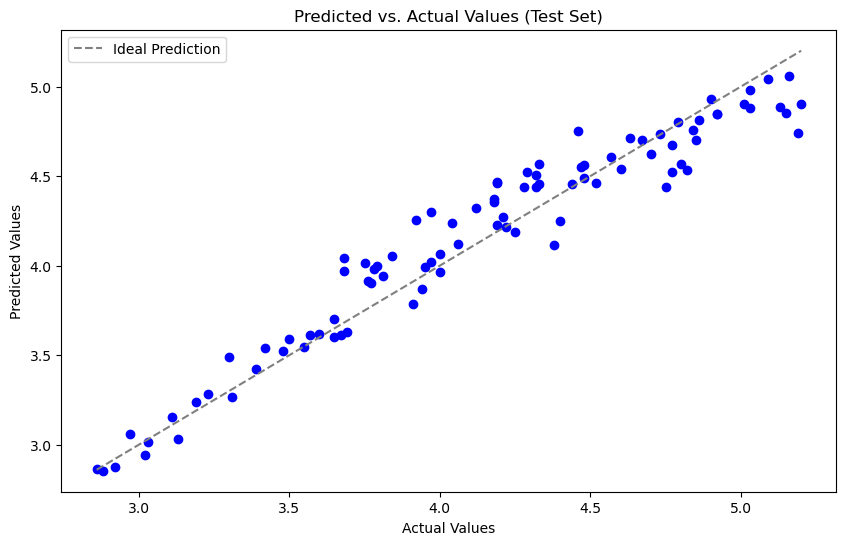

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.16107084596419158
RAE: 0.23879231955973174
MAE: 0.12534509036851962
R2: 0.9338224628541241


### Neural Network Training
### Model 4: Three input features: Temp min, Sun hours and Solar rad

In [57]:
x_reduced3 = data[['Sunlight hours','Solar Radiation', 'Temp min']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced3, x_reduced3, y_train, y_ = train_test_split(x_reduced3, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced3, x_test_reduced3, y_cv, y_test = train_test_split(x_reduced3, y_, test_size=0.50, random_state=1)



In [58]:
scaler = StandardScaler()
x_train_scaled_reduced3 = scaler.fit_transform(x_train_reduced3)
x_cv_scaled__reduced3 = scaler.transform(x_cv_reduced3)
x_test_scaled_reduced3 = scaler.transform(x_test_reduced3)

In [59]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced3, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 2s 4ms/step - loss: 16.7068 - mae: 4.0298
Epoch 2/300
9/9 [==============================] - 0s 8ms/step - loss: 15.8744 - mae: 3.9261
Epoch 3/300
9/9 [==============================] - 0s 7ms/step - loss: 15.0750 - mae: 3.8237
Epoch 4/300
9/9 [==============================] - 0s 6ms/step - loss: 14.3151 - mae: 3.7230
Epoch 5/300
9/9 [==============================] - 0s 8ms/step - loss: 13.5627 - mae: 3.6210
Epoch 6/300
9/9 [==============================] - 0s 11ms/step - loss: 12.8583 - mae: 3.5207
Epoch 7/300
9/9 [==============================] - 0s 10ms/step - loss: 12.1598 - mae: 3.4187
Epoch 8/300
9/9 [==============================] - 0s 9ms/step - loss: 11.4805 - mae: 3.3178
Epoch 9/300
9/9 [==============================] - 0s 9ms/step - loss: 10.8249 - mae: 3.2154
Epoch 10/300
9/9 [==============================] - 0s 6ms/step - loss: 10.1784 - mae: 3.1125
Epoch 11/300
9/9 [==============================] - 0s 6ms/step - l

9/9 [==============================] - 0s 7ms/step - loss: 0.1956 - mae: 0.3538
Epoch 89/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1884 - mae: 0.3465
Epoch 90/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1815 - mae: 0.3397
Epoch 91/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1755 - mae: 0.3331
Epoch 92/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1692 - mae: 0.3266
Epoch 93/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1631 - mae: 0.3204
Epoch 94/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1575 - mae: 0.3140
Epoch 95/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1523 - mae: 0.3081
Epoch 96/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1475 - mae: 0.3028
Epoch 97/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1425 - mae: 0.2977
Epoch 98/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1381 - ma

9/9 [==============================] - 0s 5ms/step - loss: 0.0414 - mae: 0.1625
Epoch 176/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0413 - mae: 0.1624
Epoch 177/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0409 - mae: 0.1614
Epoch 178/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0409 - mae: 0.1613
Epoch 179/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0407 - mae: 0.1609
Epoch 180/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0405 - mae: 0.1604
Epoch 181/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0403 - mae: 0.1601
Epoch 182/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0402 - mae: 0.1599
Epoch 183/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0400 - mae: 0.1593
Epoch 184/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0399 - mae: 0.1591
Epoch 185/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.0351 - mae: 0.1480
Epoch 263/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0352 - mae: 0.1482
Epoch 264/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0351 - mae: 0.1477
Epoch 265/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0350 - mae: 0.1476
Epoch 266/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0350 - mae: 0.1477
Epoch 267/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0349 - mae: 0.1476
Epoch 268/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0350 - mae: 0.1476
Epoch 269/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0349 - mae: 0.1474
Epoch 270/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0348 - mae: 0.1473
Epoch 271/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0349 - mae: 0.1477
Epoch 272/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 0.8245 - mae: 0.7134
Epoch 50/300
9/9 [==============================] - 0s 4ms/step - loss: 0.7989 - mae: 0.7012
Epoch 51/300
9/9 [==============================] - 0s 5ms/step - loss: 0.7765 - mae: 0.6903
Epoch 52/300
9/9 [==============================] - 0s 4ms/step - loss: 0.7526 - mae: 0.6782
Epoch 53/300
9/9 [==============================] - 0s 4ms/step - loss: 0.7299 - mae: 0.6666
Epoch 54/300
9/9 [==============================] - 0s 5ms/step - loss: 0.7093 - mae: 0.6560
Epoch 55/300
9/9 [==============================] - 0s 4ms/step - loss: 0.6878 - mae: 0.6447
Epoch 56/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6679 - mae: 0.6341
Epoch 57/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6484 - mae: 0.6237
Epoch 58/300
9/9 [==============================] - 0s 14ms/step - loss: 0.6283 - mae: 0.6122
Epoch 59/300
9/9 [==============================] - 0s 12ms/step - loss: 0.6099 - 

9/9 [==============================] - 0s 5ms/step - loss: 0.1153 - mae: 0.1970
Epoch 137/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1142 - mae: 0.1956
Epoch 138/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1128 - mae: 0.1940
Epoch 139/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1117 - mae: 0.1925
Epoch 140/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1105 - mae: 0.1912
Epoch 141/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1095 - mae: 0.1896
Epoch 142/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1085 - mae: 0.1886
Epoch 143/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1074 - mae: 0.1871
Epoch 144/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1063 - mae: 0.1859
Epoch 145/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1054 - mae: 0.1850
Epoch 146/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 0.0718 - mae: 0.1470
Epoch 224/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0716 - mae: 0.1466
Epoch 225/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0713 - mae: 0.1464
Epoch 226/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0711 - mae: 0.1463
Epoch 227/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0709 - mae: 0.1463
Epoch 228/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0707 - mae: 0.1461
Epoch 229/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0705 - mae: 0.1459
Epoch 230/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0703 - mae: 0.1458
Epoch 231/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0700 - mae: 0.1453
Epoch 232/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0699 - mae: 0.1453
Epoch 233/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 7.3504 - mae: 2.6381
Epoch 11/300
9/9 [==============================] - 0s 10ms/step - loss: 6.7280 - mae: 2.5112
Epoch 12/300
9/9 [==============================] - 0s 6ms/step - loss: 6.1344 - mae: 2.3834
Epoch 13/300
9/9 [==============================] - 0s 5ms/step - loss: 5.5708 - mae: 2.2527
Epoch 14/300
9/9 [==============================] - 0s 5ms/step - loss: 5.0521 - mae: 2.1255
Epoch 15/300
9/9 [==============================] - 0s 5ms/step - loss: 4.5688 - mae: 1.9954
Epoch 16/300
9/9 [==============================] - 0s 5ms/step - loss: 4.1276 - mae: 1.8690
Epoch 17/300
9/9 [==============================] - 0s 5ms/step - loss: 3.7232 - mae: 1.7438
Epoch 18/300
9/9 [==============================] - 0s 5ms/step - loss: 3.3648 - mae: 1.6269
Epoch 19/300
9/9 [==============================] - 0s 8ms/step - loss: 3.0456 - mae: 1.5173
Epoch 20/300
9/9 [==============================] - 0s 10ms/step - loss: 2.7707 - 

9/9 [==============================] - 0s 11ms/step - loss: 0.1953 - mae: 0.2414
Epoch 99/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1920 - mae: 0.2386
Epoch 100/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1887 - mae: 0.2356
Epoch 101/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1859 - mae: 0.2333
Epoch 102/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1828 - mae: 0.2307
Epoch 103/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1800 - mae: 0.2283
Epoch 104/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1772 - mae: 0.2256
Epoch 105/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1746 - mae: 0.2233
Epoch 106/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1720 - mae: 0.2212
Epoch 107/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1695 - mae: 0.2190
Epoch 108/300
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.0827 - mae: 0.1472
Epoch 186/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0822 - mae: 0.1469
Epoch 187/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0817 - mae: 0.1467
Epoch 188/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0813 - mae: 0.1465
Epoch 189/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0808 - mae: 0.1462
Epoch 190/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0803 - mae: 0.1459
Epoch 191/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0798 - mae: 0.1458
Epoch 192/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0793 - mae: 0.1456
Epoch 193/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0789 - mae: 0.1453
Epoch 194/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0785 - mae: 0.1453
Epoch 195/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.0548 - mae: 0.1398
Epoch 273/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0547 - mae: 0.1400
Epoch 274/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0545 - mae: 0.1401
Epoch 275/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0542 - mae: 0.1398
Epoch 276/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0541 - mae: 0.1399
Epoch 277/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0538 - mae: 0.1399
Epoch 278/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0537 - mae: 0.1397
Epoch 279/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0535 - mae: 0.1394
Epoch 280/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0534 - mae: 0.1398
Epoch 281/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0533 - mae: 0.1402
Epoch 282/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 1.0310 - mae: 0.5503
Epoch 60/300
9/9 [==============================] - 0s 15ms/step - loss: 1.0023 - mae: 0.5385
Epoch 61/300
9/9 [==============================] - 0s 12ms/step - loss: 0.9725 - mae: 0.5264
Epoch 62/300
9/9 [==============================] - 0s 7ms/step - loss: 0.9439 - mae: 0.5148
Epoch 63/300
9/9 [==============================] - 0s 7ms/step - loss: 0.9160 - mae: 0.5032
Epoch 64/300
9/9 [==============================] - 0s 10ms/step - loss: 0.8891 - mae: 0.4919
Epoch 65/300
9/9 [==============================] - 0s 6ms/step - loss: 0.8619 - mae: 0.4799
Epoch 66/300
9/9 [==============================] - 0s 16ms/step - loss: 0.8365 - mae: 0.4685
Epoch 67/300
9/9 [==============================] - 0s 10ms/step - loss: 0.8114 - mae: 0.4579
Epoch 68/300
9/9 [==============================] - 0s 13ms/step - loss: 0.7862 - mae: 0.4465
Epoch 69/300
9/9 [==============================] - 0s 14ms/step - loss: 0.76

9/9 [==============================] - 0s 6ms/step - loss: 0.1358 - mae: 0.1520
Epoch 147/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1338 - mae: 0.1516
Epoch 148/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1318 - mae: 0.1512
Epoch 149/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1299 - mae: 0.1506
Epoch 150/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1280 - mae: 0.1502
Epoch 151/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1261 - mae: 0.1497
Epoch 152/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1243 - mae: 0.1494
Epoch 153/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1225 - mae: 0.1491
Epoch 154/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1209 - mae: 0.1488
Epoch 155/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1192 - mae: 0.1483
Epoch 156/300
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.0609 - mae: 0.1501
Epoch 234/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0605 - mae: 0.1501
Epoch 235/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0603 - mae: 0.1507
Epoch 236/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0603 - mae: 0.1514
Epoch 237/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0600 - mae: 0.1510
Epoch 238/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0597 - mae: 0.1506
Epoch 239/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0595 - mae: 0.1507
Epoch 240/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0593 - mae: 0.1506
Epoch 241/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0590 - mae: 0.1508
Epoch 242/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0590 - mae: 0.1513
Epoch 243/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 9ms/step - loss: 6.4031 - mae: 2.1075
Epoch 21/300
9/9 [==============================] - 0s 8ms/step - loss: 5.9176 - mae: 1.9988
Epoch 22/300
9/9 [==============================] - 0s 5ms/step - loss: 5.4795 - mae: 1.8940
Epoch 23/300
9/9 [==============================] - 0s 6ms/step - loss: 5.0555 - mae: 1.7892
Epoch 24/300
9/9 [==============================] - 0s 10ms/step - loss: 4.6662 - mae: 1.6865
Epoch 25/300
9/9 [==============================] - 0s 6ms/step - loss: 4.2943 - mae: 1.5868
Epoch 26/300
9/9 [==============================] - 0s 6ms/step - loss: 3.9720 - mae: 1.4916
Epoch 27/300
9/9 [==============================] - 0s 5ms/step - loss: 3.6727 - mae: 1.4014
Epoch 28/300
9/9 [==============================] - 0s 4ms/step - loss: 3.4018 - mae: 1.3162
Epoch 29/300
9/9 [==============================] - 0s 5ms/step - loss: 3.1591 - mae: 1.2334
Epoch 30/300
9/9 [==============================] - 0s 5ms/step - loss: 2.9471 - m

9/9 [==============================] - 0s 4ms/step - loss: 0.1809 - mae: 0.1544
Epoch 109/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1772 - mae: 0.1538
Epoch 110/300
9/9 [==============================] - 0s 10ms/step - loss: 0.1737 - mae: 0.1535
Epoch 111/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1702 - mae: 0.1529
Epoch 112/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1669 - mae: 0.1526
Epoch 113/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1637 - mae: 0.1523
Epoch 114/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1607 - mae: 0.1523
Epoch 115/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1577 - mae: 0.1517
Epoch 116/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1549 - mae: 0.1516
Epoch 117/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1520 - mae: 0.1514
Epoch 118/300
9/9 [==============================] - 0s 6ms/step - loss: 

9/9 [==============================] - 0s 5ms/step - loss: 0.0688 - mae: 0.1566
Epoch 196/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0685 - mae: 0.1566
Epoch 197/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0683 - mae: 0.1571
Epoch 198/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0679 - mae: 0.1570
Epoch 199/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0676 - mae: 0.1570
Epoch 200/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0674 - mae: 0.1571
Epoch 201/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0671 - mae: 0.1574
Epoch 202/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0669 - mae: 0.1577
Epoch 203/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0666 - mae: 0.1581
Epoch 204/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0663 - mae: 0.1580
Epoch 205/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 0.0562 - mae: 0.1592
Epoch 283/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0561 - mae: 0.1592
Epoch 284/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0560 - mae: 0.1590
Epoch 285/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0560 - mae: 0.1587
Epoch 286/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0559 - mae: 0.1582
Epoch 287/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0559 - mae: 0.1583
Epoch 288/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0558 - mae: 0.1585
Epoch 289/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0556 - mae: 0.1587
Epoch 290/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0556 - mae: 0.1586
Epoch 291/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0557 - mae: 0.1589
Epoch 292/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 0.6007 - mae: 0.2214
Epoch 70/300
9/9 [==============================] - 0s 13ms/step - loss: 0.5736 - mae: 0.2124
Epoch 71/300
9/9 [==============================] - 0s 10ms/step - loss: 0.5481 - mae: 0.2048
Epoch 72/300
9/9 [==============================] - 0s 6ms/step - loss: 0.5241 - mae: 0.1976
Epoch 73/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5014 - mae: 0.1909
Epoch 74/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4800 - mae: 0.1856
Epoch 75/300
9/9 [==============================] - 0s 7ms/step - loss: 0.4599 - mae: 0.1805
Epoch 76/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4411 - mae: 0.1766
Epoch 77/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4231 - mae: 0.1724
Epoch 78/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4062 - mae: 0.1689
Epoch 79/300
9/9 [==============================] - 0s 12ms/step - loss: 0.3903 -

9/9 [==============================] - 0s 5ms/step - loss: 0.0775 - mae: 0.1736
Epoch 157/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0770 - mae: 0.1733
Epoch 158/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0764 - mae: 0.1734
Epoch 159/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0760 - mae: 0.1737
Epoch 160/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0756 - mae: 0.1742
Epoch 161/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0753 - mae: 0.1737
Epoch 162/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0748 - mae: 0.1735
Epoch 163/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0744 - mae: 0.1736
Epoch 164/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0740 - mae: 0.1736
Epoch 165/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0736 - mae: 0.1738
Epoch 166/300
9/9 [==============================] - 0s 5ms/step - loss:

9/9 [==============================] - 0s 5ms/step - loss: 0.0656 - mae: 0.1729
Epoch 244/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0655 - mae: 0.1726
Epoch 245/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0657 - mae: 0.1730
Epoch 246/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0656 - mae: 0.1727
Epoch 247/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0655 - mae: 0.1725
Epoch 248/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0656 - mae: 0.1731
Epoch 249/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0655 - mae: 0.1732
Epoch 250/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0655 - mae: 0.1731
Epoch 251/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0655 - mae: 0.1732
Epoch 252/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0655 - mae: 0.1732
Epoch 253/300
9/9 [==============================] - 0s 8ms/step - loss: 0

In [60]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced3)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced3)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 4ms/step
RESULTS:
Model 1: Training MSE: 0.02, CV MSE: 0.02
Model 2: Training MSE: 0.02, CV MSE: 0.02
Model 3: Training MSE: 0.02, CV MSE: 0.02
Model 4: Training MSE: 0.02, CV MSE: 0.02
Model 5: Training MSE: 0.02, CV MSE: 0.02
Model 6: Training MSE: 0.02, CV MSE: 0.02


In [61]:
# Select the model with the lowest CV MSE
model_num = 2

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced3)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 4ms/step
Selected Model: 2
Training MSE: 0.02
Cross Validation MSE: 0.02
Test MSE: 0.01


In [62]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.95          4.114770
1           4.19          4.430351
2           3.48          3.638040
3           3.97          4.255633
4           4.00          4.074394
5           4.82          4.628464
6           4.77          4.677929

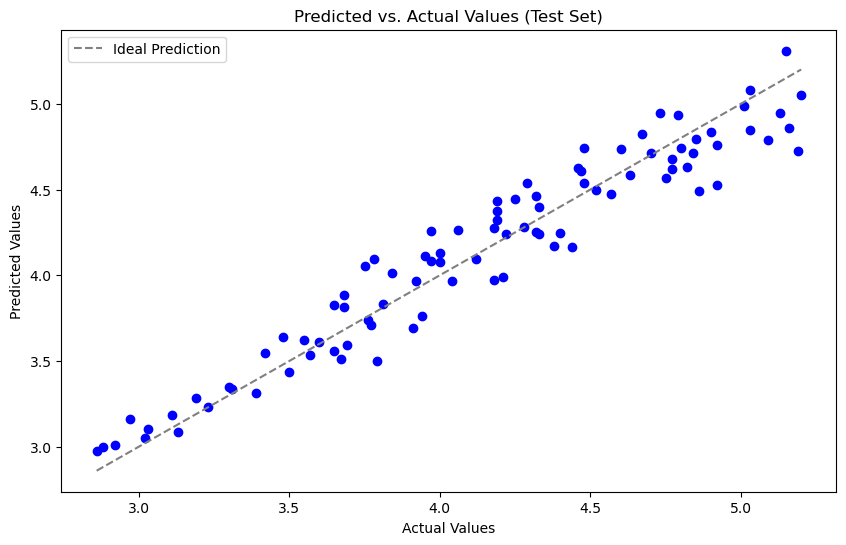

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.16681369944849186
RAE: 0.26225400301252305
MAE: 0.13766042294709577
R2: 0.9290193210944088


### Neural Network Training
### Model 5: Three input features: Temp min and max, Wind speed

In [65]:
x_reduced4 = data[['Temp max','Wind speed', 'Temp min']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced4, x_reduced4, y_train, y_ = train_test_split(x_reduced4, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced4, x_test_reduced4, y_cv, y_test = train_test_split(x_reduced4, y_, test_size=0.50, random_state=1)


In [66]:
scaler = StandardScaler()
x_train_scaled_reduced4 = scaler.fit_transform(x_train_reduced4)
x_cv_scaled__reduced4 = scaler.transform(x_cv_reduced4)
x_test_scaled_reduced4 = scaler.transform(x_test_reduced4)

In [67]:
lambdas = [0, 0.01, 0.03, 0.5]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced4, y_train,
    epochs=250
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/250
9/9 [==============================] - 1s 5ms/step - loss: 14.9625 - mae: 3.7982
Epoch 2/250
9/9 [==============================] - 0s 7ms/step - loss: 14.1439 - mae: 3.6900
Epoch 3/250
9/9 [==============================] - 0s 6ms/step - loss: 13.3752 - mae: 3.5844
Epoch 4/250
9/9 [==============================] - 0s 5ms/step - loss: 12.6193 - mae: 3.4775
Epoch 5/250
9/9 [==============================] - 0s 5ms/step - loss: 11.8986 - mae: 3.3720
Epoch 6/250
9/9 [==============================] - 0s 12ms/step - loss: 11.1886 - mae: 3.2642
Epoch 7/250
9/9 [==============================] - 0s 11ms/step - loss: 10.5170 - mae: 3.1580
Epoch 8/250
9/9 [==============================] - 0s 4ms/step - loss: 9.8661 - mae: 3.0515
Epoch 9/250
9/9 [==============================] - 0s 6ms/step - loss: 9.2269 - mae: 2.9429
Epoch 10/250
9/9 [==============================] - 0s 5ms/step - loss: 8.6089 - mae: 2.8317
Epoch 11/250
9/9 [==============================] - 0s 5ms/step - loss

9/9 [==============================] - 0s 7ms/step - loss: 0.3707 - mae: 0.4641
Epoch 89/250
9/9 [==============================] - 0s 8ms/step - loss: 0.3628 - mae: 0.4593
Epoch 90/250
9/9 [==============================] - 0s 4ms/step - loss: 0.3554 - mae: 0.4547
Epoch 91/250
9/9 [==============================] - 0s 6ms/step - loss: 0.3479 - mae: 0.4502
Epoch 92/250
9/9 [==============================] - 0s 5ms/step - loss: 0.3408 - mae: 0.4457
Epoch 93/250
9/9 [==============================] - 0s 5ms/step - loss: 0.3337 - mae: 0.4414
Epoch 94/250
9/9 [==============================] - 0s 4ms/step - loss: 0.3270 - mae: 0.4370
Epoch 95/250
9/9 [==============================] - 0s 4ms/step - loss: 0.3202 - mae: 0.4327
Epoch 96/250
9/9 [==============================] - 0s 6ms/step - loss: 0.3137 - mae: 0.4286
Epoch 97/250
9/9 [==============================] - 0s 6ms/step - loss: 0.3070 - mae: 0.4241
Epoch 98/250
9/9 [==============================] - 0s 7ms/step - loss: 0.3012 - ma

9/9 [==============================] - 0s 8ms/step - loss: 0.0828 - mae: 0.2267
Epoch 176/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0820 - mae: 0.2255
Epoch 177/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0810 - mae: 0.2240
Epoch 178/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0801 - mae: 0.2228
Epoch 179/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0790 - mae: 0.2214
Epoch 180/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0783 - mae: 0.2203
Epoch 181/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0775 - mae: 0.2191
Epoch 182/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0764 - mae: 0.2176
Epoch 183/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0756 - mae: 0.2165
Epoch 184/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0748 - mae: 0.2153
Epoch 185/250
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 9.9404 - mae: 2.9153
Epoch 13/250
9/9 [==============================] - 0s 5ms/step - loss: 9.4241 - mae: 2.8184
Epoch 14/250
9/9 [==============================] - 0s 6ms/step - loss: 8.9165 - mae: 2.7198
Epoch 15/250
9/9 [==============================] - 0s 5ms/step - loss: 8.4165 - mae: 2.6219
Epoch 16/250
9/9 [==============================] - 0s 7ms/step - loss: 7.9281 - mae: 2.5224
Epoch 17/250
9/9 [==============================] - 0s 6ms/step - loss: 7.4553 - mae: 2.4258
Epoch 18/250
9/9 [==============================] - 0s 5ms/step - loss: 6.9741 - mae: 2.3280
Epoch 19/250
9/9 [==============================] - 0s 5ms/step - loss: 6.5167 - mae: 2.2306
Epoch 20/250
9/9 [==============================] - 0s 6ms/step - loss: 6.0632 - mae: 2.1347
Epoch 21/250
9/9 [==============================] - 0s 6ms/step - loss: 5.6278 - mae: 2.0383
Epoch 22/250
9/9 [==============================] - 0s 13ms/step - loss: 5.1958 - m

9/9 [==============================] - 0s 5ms/step - loss: 0.2575 - mae: 0.3261
Epoch 101/250
9/9 [==============================] - 0s 5ms/step - loss: 0.2539 - mae: 0.3233
Epoch 102/250
9/9 [==============================] - 0s 5ms/step - loss: 0.2505 - mae: 0.3208
Epoch 103/250
9/9 [==============================] - 0s 5ms/step - loss: 0.2466 - mae: 0.3183
Epoch 104/250
9/9 [==============================] - 0s 4ms/step - loss: 0.2434 - mae: 0.3161
Epoch 105/250
9/9 [==============================] - 0s 5ms/step - loss: 0.2399 - mae: 0.3139
Epoch 106/250
9/9 [==============================] - 0s 5ms/step - loss: 0.2365 - mae: 0.3116
Epoch 107/250
9/9 [==============================] - 0s 4ms/step - loss: 0.2337 - mae: 0.3097
Epoch 108/250
9/9 [==============================] - 0s 4ms/step - loss: 0.2302 - mae: 0.3072
Epoch 109/250
9/9 [==============================] - 0s 6ms/step - loss: 0.2273 - mae: 0.3048
Epoch 110/250
9/9 [==============================] - 0s 8ms/step - loss: 0

9/9 [==============================] - 0s 7ms/step - loss: 0.1100 - mae: 0.1948
Epoch 188/250
9/9 [==============================] - 0s 6ms/step - loss: 0.1093 - mae: 0.1941
Epoch 189/250
9/9 [==============================] - 0s 5ms/step - loss: 0.1086 - mae: 0.1933
Epoch 190/250
9/9 [==============================] - 0s 4ms/step - loss: 0.1080 - mae: 0.1927
Epoch 191/250
9/9 [==============================] - 0s 6ms/step - loss: 0.1073 - mae: 0.1920
Epoch 192/250
9/9 [==============================] - 0s 6ms/step - loss: 0.1067 - mae: 0.1914
Epoch 193/250
9/9 [==============================] - 0s 4ms/step - loss: 0.1061 - mae: 0.1906
Epoch 194/250
9/9 [==============================] - 0s 6ms/step - loss: 0.1054 - mae: 0.1898
Epoch 195/250
9/9 [==============================] - 0s 5ms/step - loss: 0.1050 - mae: 0.1893
Epoch 196/250
9/9 [==============================] - 0s 6ms/step - loss: 0.1043 - mae: 0.1886
Epoch 197/250
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 4.1553 - mae: 1.8051
Epoch 25/250
9/9 [==============================] - 0s 4ms/step - loss: 3.7869 - mae: 1.6979
Epoch 26/250
9/9 [==============================] - 0s 5ms/step - loss: 3.4416 - mae: 1.5944
Epoch 27/250
9/9 [==============================] - 0s 8ms/step - loss: 3.1331 - mae: 1.4957
Epoch 28/250
9/9 [==============================] - 0s 6ms/step - loss: 2.8504 - mae: 1.3994
Epoch 29/250
9/9 [==============================] - 0s 5ms/step - loss: 2.5977 - mae: 1.3081
Epoch 30/250
9/9 [==============================] - 0s 5ms/step - loss: 2.3780 - mae: 1.2258
Epoch 31/250
9/9 [==============================] - 0s 5ms/step - loss: 2.1812 - mae: 1.1491
Epoch 32/250
9/9 [==============================] - 0s 5ms/step - loss: 2.0122 - mae: 1.0830
Epoch 33/250
9/9 [==============================] - 0s 3ms/step - loss: 1.8644 - mae: 1.0231
Epoch 34/250
9/9 [==============================] - 0s 5ms/step - loss: 1.7437 - ma

9/9 [==============================] - 0s 6ms/step - loss: 0.3223 - mae: 0.3143
Epoch 113/250
9/9 [==============================] - 0s 6ms/step - loss: 0.3170 - mae: 0.3107
Epoch 114/250
9/9 [==============================] - 0s 6ms/step - loss: 0.3117 - mae: 0.3072
Epoch 115/250
9/9 [==============================] - 0s 8ms/step - loss: 0.3067 - mae: 0.3038
Epoch 116/250
9/9 [==============================] - 0s 6ms/step - loss: 0.3019 - mae: 0.3006
Epoch 117/250
9/9 [==============================] - 0s 5ms/step - loss: 0.2968 - mae: 0.2971
Epoch 118/250
9/9 [==============================] - 0s 5ms/step - loss: 0.2923 - mae: 0.2940
Epoch 119/250
9/9 [==============================] - 0s 5ms/step - loss: 0.2879 - mae: 0.2910
Epoch 120/250
9/9 [==============================] - 0s 5ms/step - loss: 0.2833 - mae: 0.2876
Epoch 121/250
9/9 [==============================] - 0s 5ms/step - loss: 0.2792 - mae: 0.2850
Epoch 122/250
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 0.1175 - mae: 0.1639
Epoch 200/250
9/9 [==============================] - 0s 12ms/step - loss: 0.1167 - mae: 0.1637
Epoch 201/250
9/9 [==============================] - 0s 5ms/step - loss: 0.1158 - mae: 0.1633
Epoch 202/250
9/9 [==============================] - 0s 7ms/step - loss: 0.1150 - mae: 0.1630
Epoch 203/250
9/9 [==============================] - 0s 6ms/step - loss: 0.1141 - mae: 0.1622
Epoch 204/250
9/9 [==============================] - 0s 7ms/step - loss: 0.1132 - mae: 0.1618
Epoch 205/250
9/9 [==============================] - 0s 6ms/step - loss: 0.1124 - mae: 0.1617
Epoch 206/250
9/9 [==============================] - 0s 5ms/step - loss: 0.1115 - mae: 0.1611
Epoch 207/250
9/9 [==============================] - 0s 5ms/step - loss: 0.1107 - mae: 0.1606
Epoch 208/250
9/9 [==============================] - 0s 5ms/step - loss: 0.1099 - mae: 0.1601
Epoch 209/250
9/9 [==============================] - 0s 5ms/step - loss: 

9/9 [==============================] - 0s 5ms/step - loss: 3.1274 - mae: 1.0214
Epoch 37/250
9/9 [==============================] - 0s 4ms/step - loss: 2.9347 - mae: 0.9623
Epoch 38/250
9/9 [==============================] - 0s 5ms/step - loss: 2.7568 - mae: 0.9058
Epoch 39/250
9/9 [==============================] - 0s 4ms/step - loss: 2.5879 - mae: 0.8521
Epoch 40/250
9/9 [==============================] - 0s 5ms/step - loss: 2.4279 - mae: 0.8006
Epoch 41/250
9/9 [==============================] - 0s 4ms/step - loss: 2.2786 - mae: 0.7516
Epoch 42/250
9/9 [==============================] - 0s 8ms/step - loss: 2.1375 - mae: 0.7070
Epoch 43/250
9/9 [==============================] - 0s 8ms/step - loss: 2.0080 - mae: 0.6663
Epoch 44/250
9/9 [==============================] - 0s 5ms/step - loss: 1.8813 - mae: 0.6257
Epoch 45/250
9/9 [==============================] - 0s 5ms/step - loss: 1.7644 - mae: 0.5883
Epoch 46/250
9/9 [==============================] - 0s 6ms/step - loss: 1.6559 - ma

9/9 [==============================] - 0s 4ms/step - loss: 0.0981 - mae: 0.1875
Epoch 124/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0975 - mae: 0.1884
Epoch 125/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0967 - mae: 0.1881
Epoch 126/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0961 - mae: 0.1886
Epoch 127/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0955 - mae: 0.1884
Epoch 128/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0949 - mae: 0.1886
Epoch 129/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0943 - mae: 0.1888
Epoch 130/250
9/9 [==============================] - 0s 3ms/step - loss: 0.0939 - mae: 0.1880
Epoch 131/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0934 - mae: 0.1878
Epoch 132/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0930 - mae: 0.1888
Epoch 133/250
9/9 [==============================] - 0s 7ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.0856 - mae: 0.1891
Epoch 211/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0854 - mae: 0.1880
Epoch 212/250
9/9 [==============================] - 0s 11ms/step - loss: 0.0856 - mae: 0.1873
Epoch 213/250
9/9 [==============================] - 0s 10ms/step - loss: 0.0856 - mae: 0.1863
Epoch 214/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0856 - mae: 0.1889
Epoch 215/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0855 - mae: 0.1903
Epoch 216/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0854 - mae: 0.1896
Epoch 217/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0853 - mae: 0.1889
Epoch 218/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0853 - mae: 0.1883
Epoch 219/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0853 - mae: 0.1877
Epoch 220/250
9/9 [==============================] - 0s 5ms/step - loss:

In [68]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced4)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced4)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 4ms/step
RESULTS:
Model 1: Training MSE: 0.02, CV MSE: 0.02
Model 2: Training MSE: 0.02, CV MSE: 0.02
Model 3: Training MSE: 0.02, CV MSE: 0.02
Model 4: Training MSE: 0.03, CV MSE: 0.03


In [69]:
# Select the model with the lowest CV MSE
model_num = 2

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced4)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 4ms/step
Selected Model: 2
Training MSE: 0.02
Cross Validation MSE: 0.02
Test MSE: 0.02


In [70]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.95          4.023524
1           4.19          4.008513
2           3.48          3.473341
3           3.97          3.682565
4           4.00          3.771595
5           4.82          4.715949
6           4.77          4.863936

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.20096900954087962
RAE: 0.3060294270339962
MAE: 0.16063869331194008
R2: 0.8969768308221945


### Decision Tree 
### Model 1: All input features

Mean Squared Error on Validation Set for Decision Tree: 0.01
Mean Squared Error for Decision Tree: 0.01


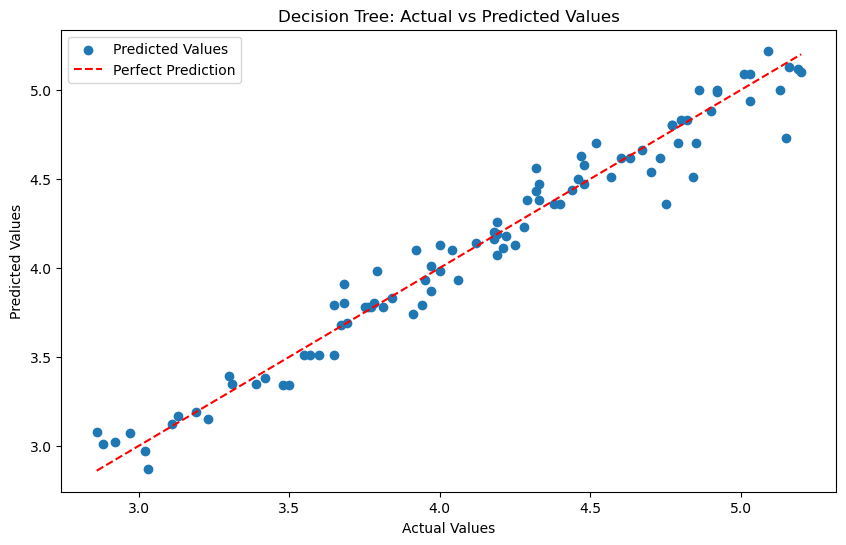

In [72]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)

# Fitting the model on the training data
tree.fit(x_train_scaled, y_train)

yhat_cv = tree.predict(x_cv_scaled)

# Evaluating the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predicting on the test set
yhat_test = tree.predict(x_test_scaled)

# Evaluating the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualizing the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [73]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1190679382245425
RAE: 0.16835101713760944
MAE: 0.08836956521739127
R2: 0.963836838731973


### Decision Tree
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Decision Tree: 0.04
Mean Squared Error for Decision Tree: 0.02


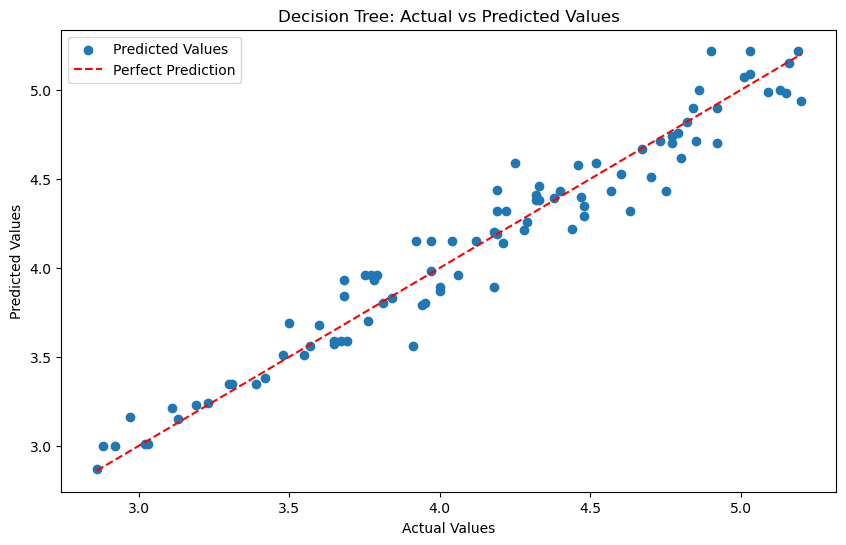

In [74]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [75]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1396813143022981
RAE: 0.205831378886573
MAE: 0.10804347826086956
R2: 0.9502316380617125


### Decision Tree
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Decision Tree: 0.04
Mean Squared Error for Decision Tree: 0.05


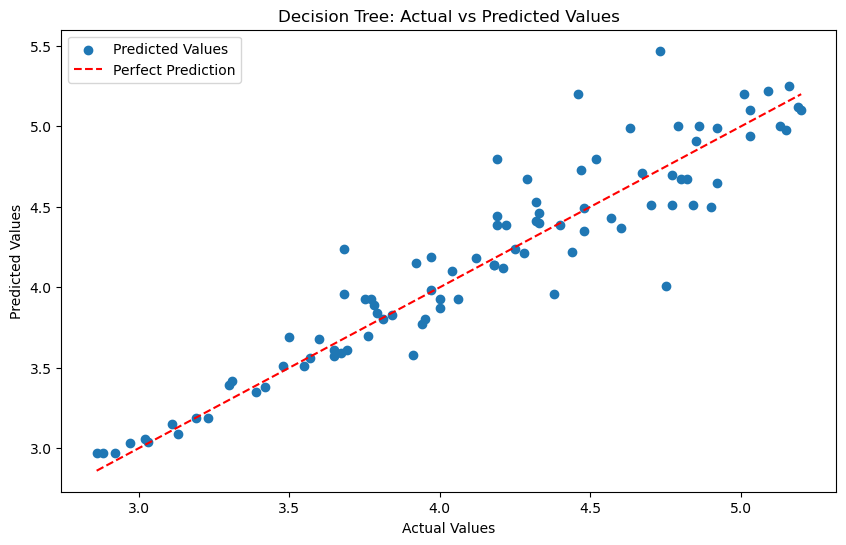

In [76]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced2, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced2)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced2)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [77]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.22281548225030232
RAE: 0.29756508195171577
MAE: 0.15619565217391307
R2: 0.8733610065999285


### Decision Tree
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Mean Squared Error on Validation Set for Decision Tree: 0.04
Mean Squared Error for Decision Tree: 0.05


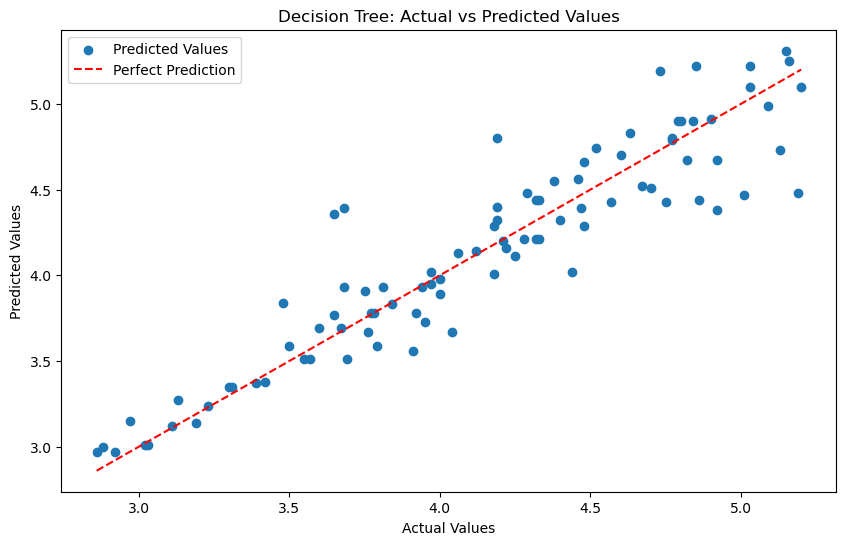

In [78]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced3, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced3)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced3)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [79]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.23176309118317917
RAE: 0.3112319541916694
MAE: 0.16336956521739138
R2: 0.862985897386944


### Decision Tree
### Model 5: Three input features: Temp min, Temp max  and Wind speed

Mean Squared Error on Validation Set for Decision Tree: 0.04
Mean Squared Error for Decision Tree: 0.05


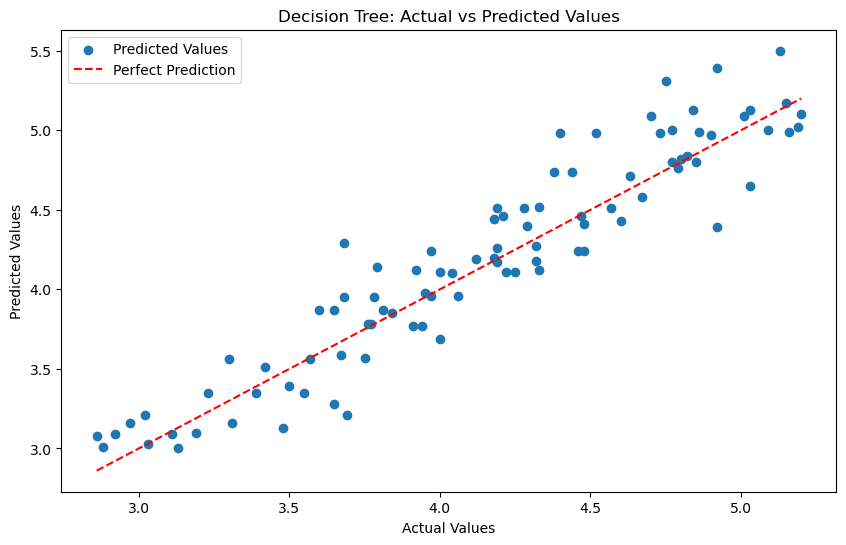

In [80]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced4, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced4)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced4)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [81]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.22909320298117514
RAE: 0.3385656986715763
MAE: 0.17771739130434785
R2: 0.866124492691353


### Random Forest
### Model 1: All input features

Mean Squared Error on Validation Set for Random Forest: 0.04
Mean Squared Error on Test Set for Random Forest: 0.01


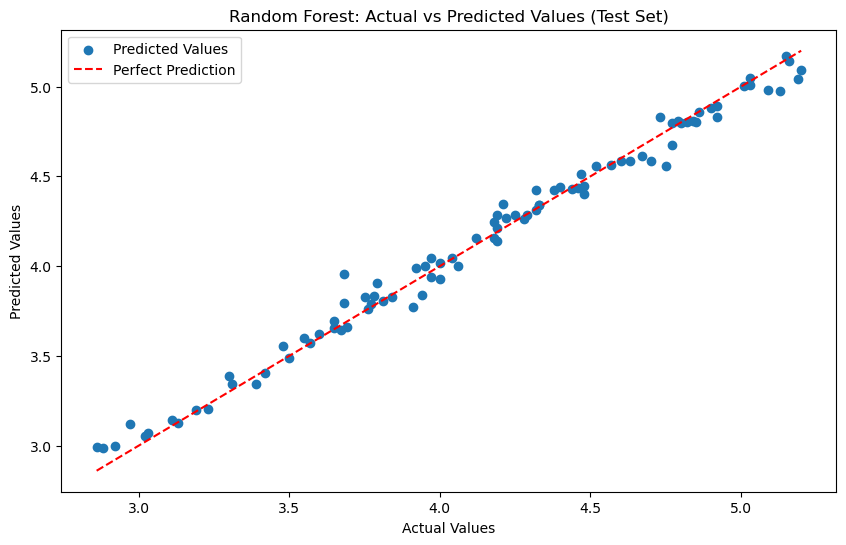

In [82]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [83]:
feature_list = ['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation']
x_train_df = pd.DataFrame(x_train_scaled, columns=feature_list)

# Get feature importances
feature_list = list(x_train_df.columns)
feature_imp = pd.Series(rf_model.feature_importances_, index=feature_list).sort_values(ascending=False)

# Print feature importances
print(feature_imp)

Temp max           0.644238
Solar Radiation    0.269566
Wind speed         0.071662
Temp min           0.008622
Sunlight hours     0.005913
dtype: float64


In [84]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.07184681470050452
RAE: 0.10033969109987688
MAE: 0.0526695652173912
R2: 0.986832850747383


### Random Forest
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Random Forest: 0.04
Mean Squared Error on Test Set for Random Forest: 0.01


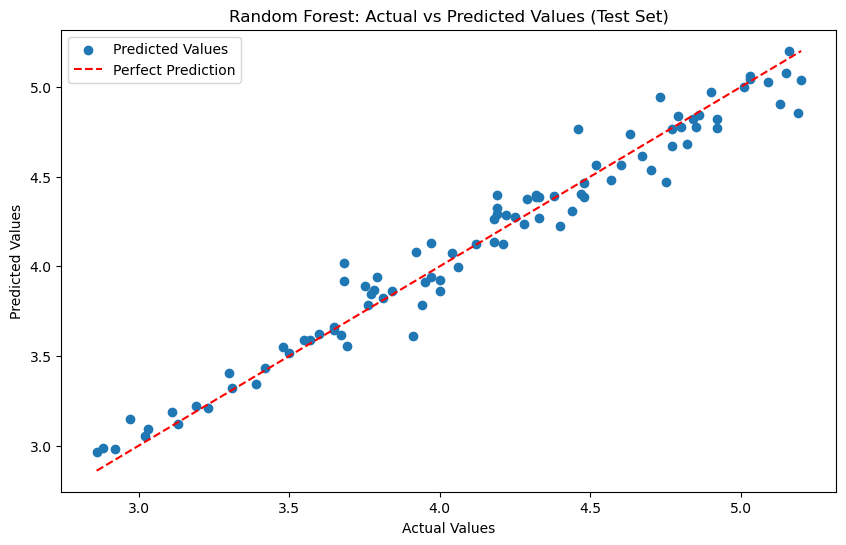

In [85]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [86]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.11740021665041836
RAE: 0.16776706896008348
MAE: 0.08806304347826047
R2: 0.9648427807079217


### Random Forest
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Random Forest: 0.04
Mean Squared Error on Test Set for Random Forest: 0.02


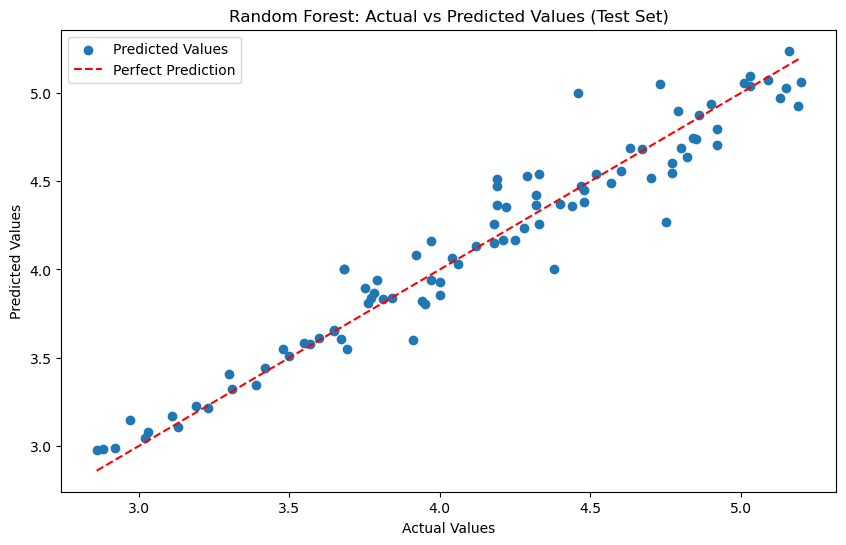

In [87]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced2, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [88]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.15337515883553635
RAE: 0.20940547305114154
MAE: 0.10991956521739071
R2: 0.9399950922861965


### Random Forest
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Mean Squared Error on Validation Set for Random Forest: 0.04
Mean Squared Error on Test Set for Random Forest: 0.03


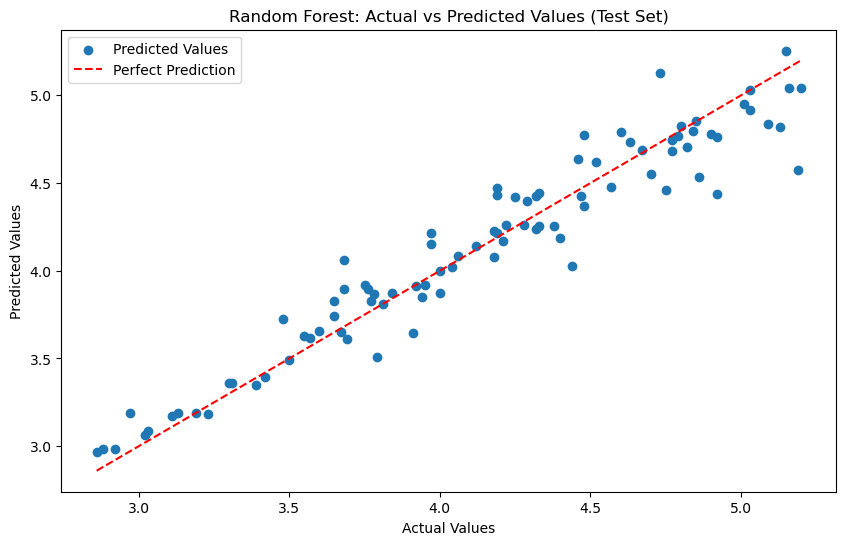

In [89]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced3, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [90]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.17058065063061814
RAE: 0.2369525035675207
MAE: 0.12437934782608641
R2: 0.9257773844836212


### Random Forest
### Model 5: Three input features: Temp min and max, Wind speed

Mean Squared Error on Validation Set for Random Forest: 0.04
Mean Squared Error on Test Set for Random Forest: 0.04


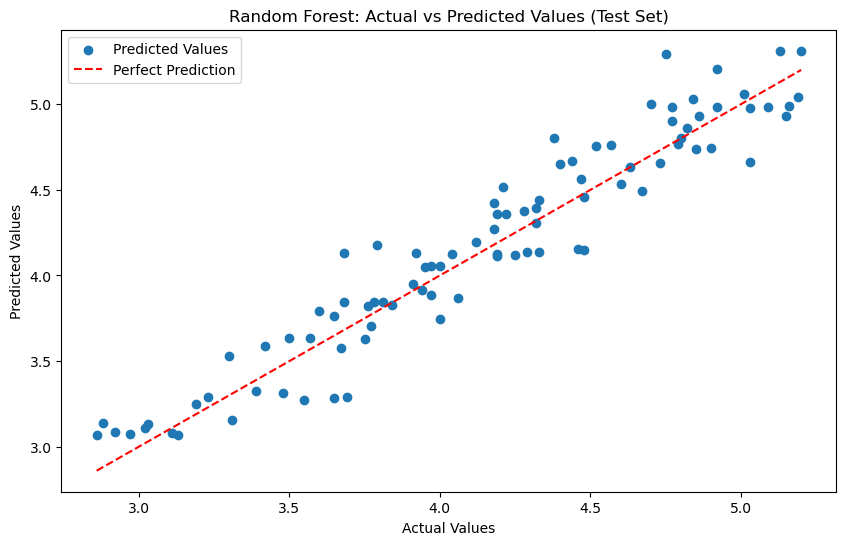

In [91]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced4, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [92]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.18765859148070374
RAE: 0.2885532292262185
MAE: 0.15146521739130406
R2: 0.9101716079541743


### Xgboost 
### Model 1: All input features

Mean Squared Error on Validation Set for XGBoost: 0.01
Mean Squared Error on Test Set for XGBoost: 0.01


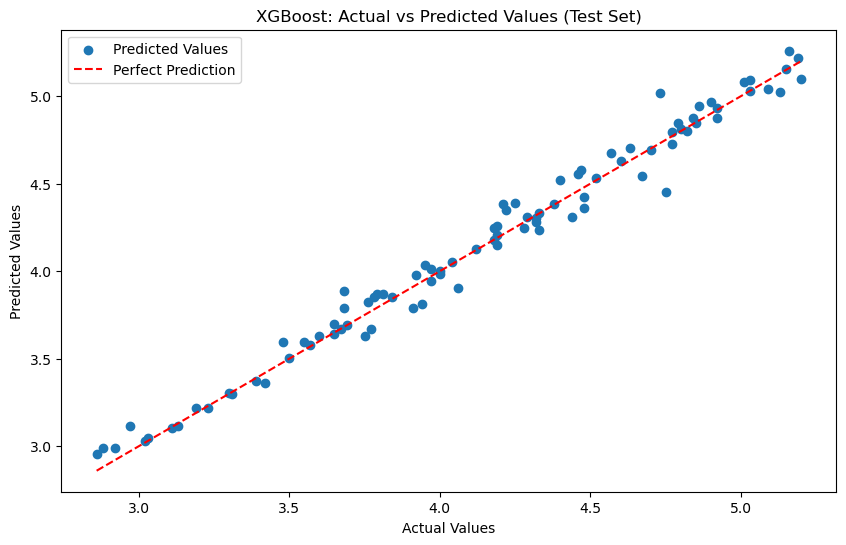

In [93]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=42)

# Fit the model on the training data
xgb_model.fit(x_train_scaled, y_train)

# Predict on the validation set
yhat_cv = xgb_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Predict on the test set
yhat_test = xgb_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [94]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.08520586592895844
RAE: 0.11734970698336
MAE: 0.06159833638564402
R2: 0.9814810776767717


### Xgboost
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Mean Squared Error on Validation Set for XGBoost: 0.01
Mean Squared Error on Test Set for XGBoost: 0.02


Text(0, 0.5, 'Predicted Values')

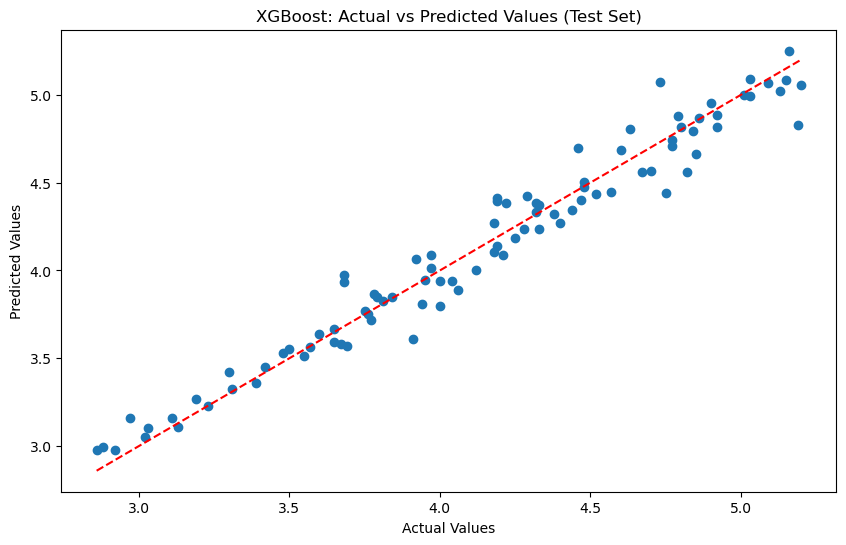

In [95]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Instantiate an XGBoost regressor
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [96]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.12521795803243507
RAE: 0.18134965381138138
MAE: 0.09519271301186603
R2: 0.9600046081739304


### Xgboost
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
Mean Squared Error on Validation Set for XGBoost: 0.02
Mean Squared Error on Test Set for XGBoost: 0.02


Text(0, 0.5, 'Predicted Values')

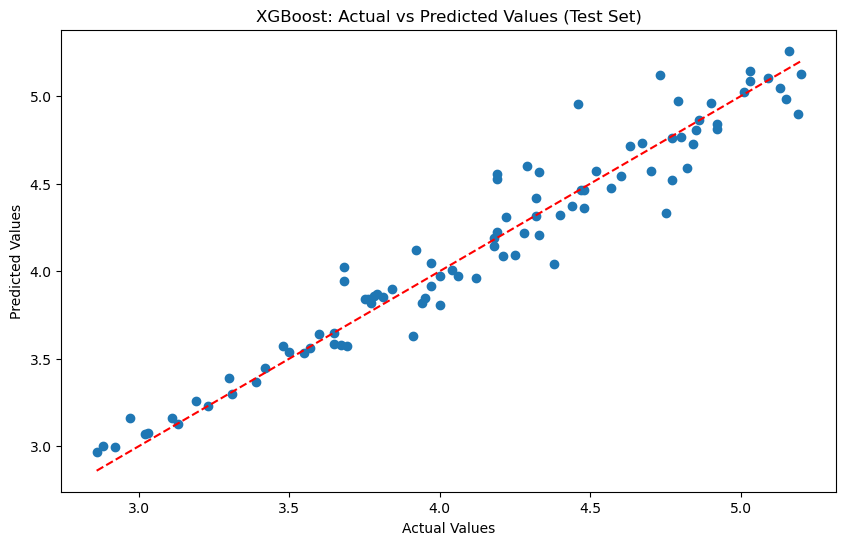

In [97]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced2, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced2, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [98]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.15264430257174003
RAE: 0.21079438826880711
MAE: 0.11064862427504166
R2: 0.9405655950347016


### Xgboost
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Mean Squared Error on Validation Set for XGBoost: 0.03
Mean Squared Error on Test Set for XGBoost: 0.04


Text(0, 0.5, 'Predicted Values')

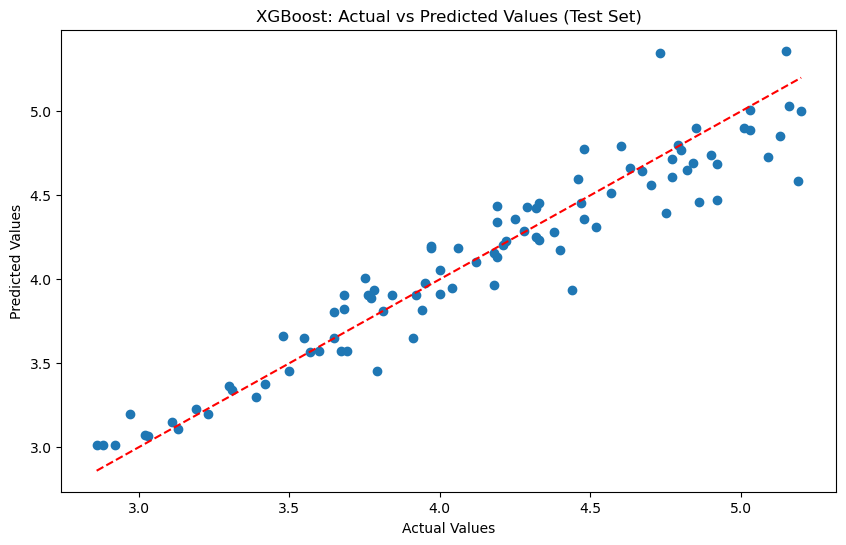

In [99]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced3, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced3, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [100]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1876659501645252
RAE: 0.2651749237305492
MAE: 0.13919365095055625
R2: 0.910164562908271


### Xgboost
### Model 5: Three input features: Temp min and max, wind speed

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Mean Squared Error on Validation Set for XGBoost: 0.02
Mean Squared Error on Test Set for XGBoost: 0.04


Text(0, 0.5, 'Predicted Values')

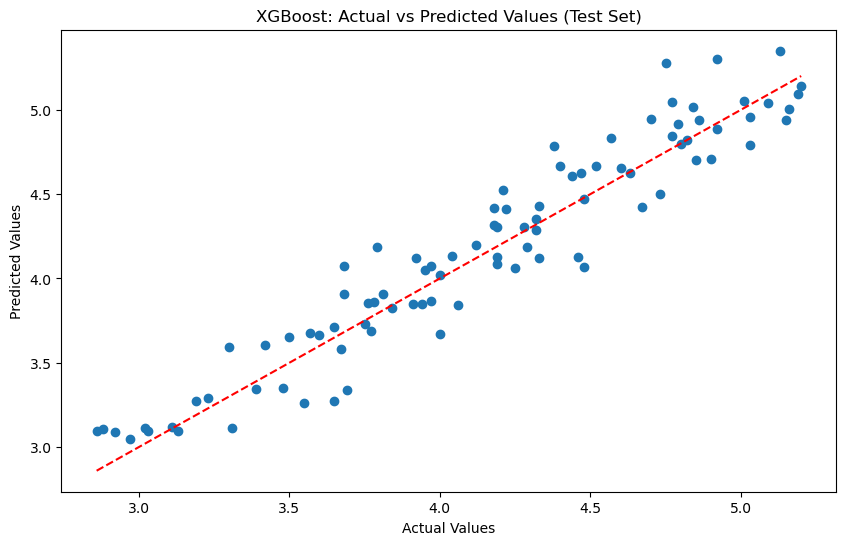

In [101]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced4, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced4, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [102]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.19179155755499303
RAE: 0.2933432086364106
MAE: 0.15397953779801082
R2: 0.9061713012570597


### SVR
### Model 1: All input features

Best Parameters: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'linear'}
Mean Squared Error on Validation Set for SVR: 0.00
Mean Squared Error on Test Set for SVR: 0.00


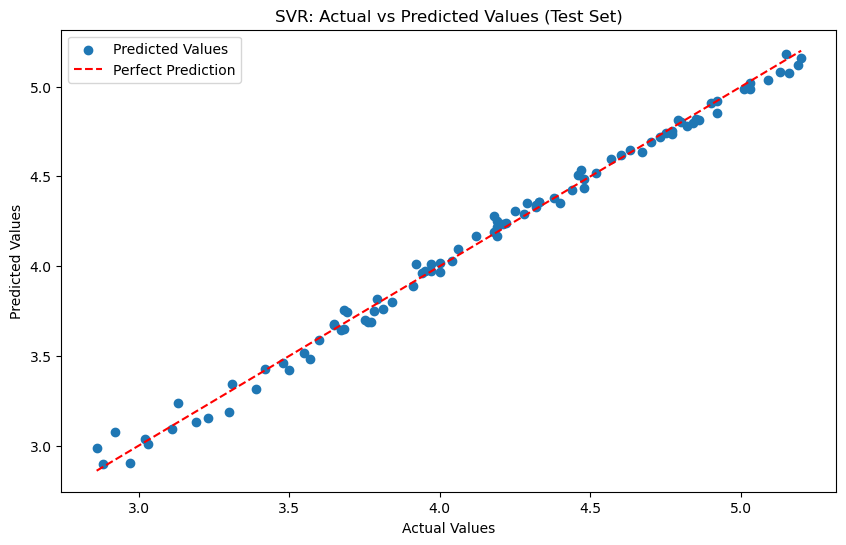

In [103]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [104]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.04914332330728742
RAE: 0.07435573507190443
MAE: 0.039030260056895257
R2: 0.9938396446338262


### SVR
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Best Parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.02
Mean Squared Error on Test Set for SVR: 0.01


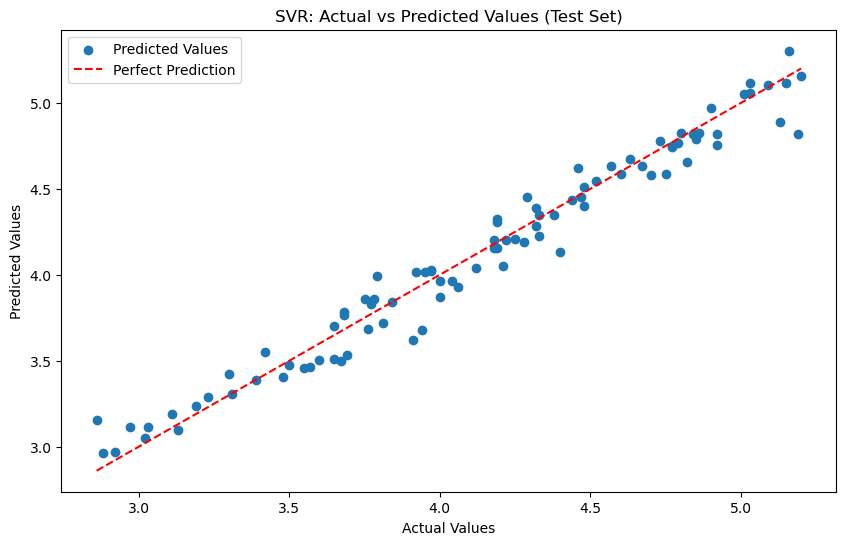

In [105]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [106]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.11281133479252425
RAE: 0.165748355622512
MAE: 0.087003395470349
R2: 0.9675374824903074


### SVR
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Best Parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.02
Mean Squared Error on Test Set for SVR: 0.02


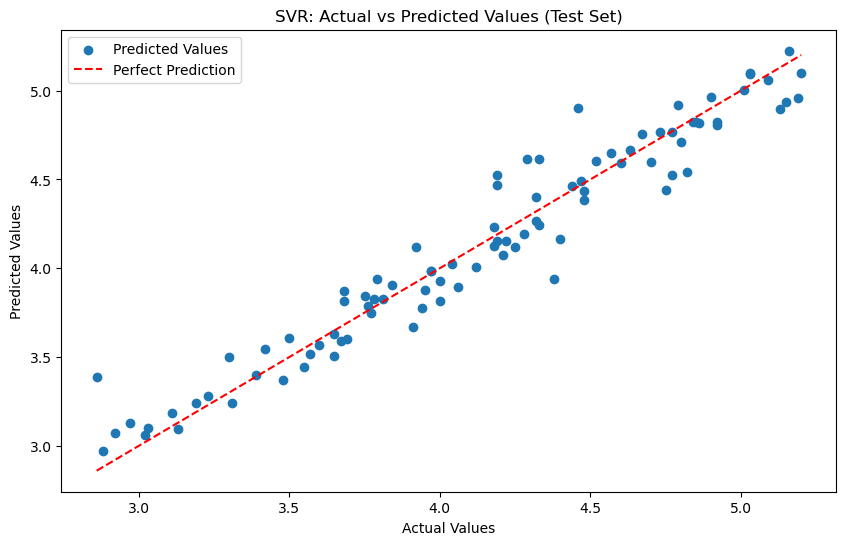

In [107]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced2, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced2, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [108]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.15428165149068887
RAE: 0.21888975498437757
MAE: 0.11489798402999671
R2: 0.9392837026337115


### SVR
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Best Parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.03
Mean Squared Error on Test Set for SVR: 0.03


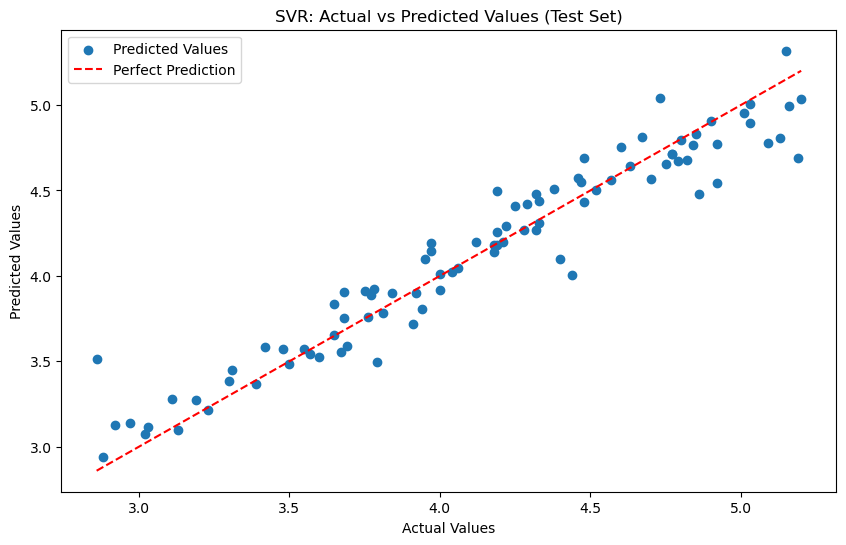

In [109]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced3, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced3, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [110]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.17088425451700148
RAE: 0.23536326850110492
MAE: 0.12354513836162799
R2: 0.9255129426727899


### SVR
### Model 5: Three input features: Temp min and max, Wind speed

Best Parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.02
Mean Squared Error on Test Set for SVR: 0.03


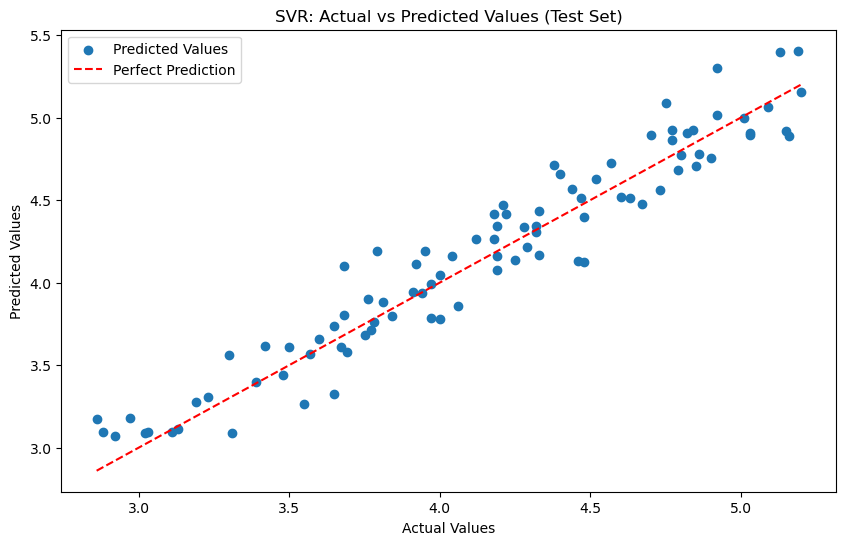

In [111]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced4, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced4, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [112]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.17391895062536064
RAE: 0.26830494737017224
MAE: 0.14083663970617247
R2: 0.92284385264249
